# Assignment 2

**Authors**:
* Francesca Boccardi, francesca.boccardi@studio.unibo.it
* Luigi Podda, luigi.podda@studio.unibo.it
* Matteo Nestola, matteo.nestola@studio.unibo.it


**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Keywords**: Transformers, Question Answering, CoQA

## Deadlines

* **December 11**, 2022: deadline for having assignments graded by January 11, 2023
* **January 11**, 2023: deadline for half-point speed bonus per assignment
* **After January 11**, 2023: assignments are still accepted, but there will be no speed bonus

# Overview

### Problem

Question Answering (QA) on [CoQA](https://stanfordnlp.github.io/coqa/) dataset: a conversational QA dataset.

### Task

Given a question $Q$, a text passage $P$, the task is to generate the answer $A$.<br>
$\rightarrow A$ can be: (i) a free-form text or (ii) unanswerable;

**Note**: an question $Q$ can refer to previous dialogue turns. <br>
$\rightarrow$ dialogue history $H$ may be a valuable input to provide the correct answer $A$.

### Models

We are going to experiment with transformer-based models to define the following models:

1.  $A = f_\theta(Q, P)$

2. $A = f_\theta(Q, P, H)$

where $f_\theta$ is the transformer-based model we have to define with $\theta$ parameters.

# The CoQA dataset

<center>
    <img src="https://drive.google.com/uc?export=view&id=16vrgyfoV42Z2AQX0QY7LHTfrgektEKKh" width="750"/>
</center>

For detailed information about the dataset, feel free to check the original [paper](https://arxiv.org/pdf/1808.07042.pdf).



### Rationales

Each QA pair is paired with a rationale $R$: it is a text span extracted from the given text passage $P$. <br>
$\rightarrow$ $R$ is not a requested output, but it can be used as an additional information at training time!

### Dataset Statistics

* **127k** QA pairs.
* **8k** conversations.
* **7** diverse domains: Children's Stories, Literature, Mid/High School Exams, News, Wikipedia, Reddit, Science.
* Average conversation length: **15 turns** (i.e., QA pairs).
* Almost **half** of CoQA questions refer back to **conversational history**.
* Only **train** and **validation** sets are available.

### Dataset snippet

The dataset is stored in JSON format. Each dialogue is represented as follows:

```
{
    "source": "mctest",
    "id": "3dr23u6we5exclen4th8uq9rb42tel",
    "filename": "mc160.test.41",
    "story": "Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton.
    Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. [...]" % <-- $P$
    "questions": [
        {
            "input_text": "What color was Cotton?",   % <-- $Q_1$
            "turn_id": 1
        },
        {
            "input_text": "Where did she live?",
            "turn_id": 2
        },
        [...]
    ],
    "answers": [
        {
            "span_start": 59,   % <-- $R_1$ start index
            "spand_end": 93,    % <-- $R_1$ end index
            "span_text": "a little white kitten named Cotton",   % <-- $R_1$
            "input_text" "white",   % <-- $A_1$      
            "turn_id": 1
        },
        [...]
    ]
}
```

### Simplifications

Each dialogue also contains an additional field ```additional_answers```. For simplicity, we **ignore** this field and only consider one groundtruth answer $A$ and text rationale $R$.

CoQA only contains 1.3% of unanswerable questions. For simplicity, we **ignore** those QA pairs.

# Instructions

## [Task 1] Remove unaswerable QA pairs

Write your own script to remove unaswerable QA pairs from both train and validation sets.

## [Task 2] Train, Validation and Test splits

CoQA only provides a train and validation set since the test set is hidden for evaluation purposes.

We'll consider the provided validation set as a test set. <br>
$\rightarrow$ Write your own script to:
* Split the train data in train and validation splits (80% train and 20% val)
* Perform splits such that a dialogue appears in one split only! (i.e., split at dialogue level)
* Perform splitting using the following seed for reproducibility: 42

#### Reproducibility Memo

Check back tutorial 2 on how to fix a specific random seed for reproducibility!

## [Task 3] Model definition

Write your own script to define the following transformer-based models from [huggingface](https://HuggingFace.co/).

* [M1] DistilRoBERTa (distilberta-base)
* [M2] BERTTiny (bert-tiny)

**Note**: Remember to install the ```transformers``` python package!

**Note**: We consider small transformer models for computational reasons!

## [Task 4] Question generation with text passage $P$ and question $Q$

We want to define $f_\theta(P, Q)$.

Write your own script to implement $f_\theta$ for each model: M1 and M2.

#### Formulation

Consider a dialogue on text passage $P$.

For each question $Q_i$ at dialogue turn $i$, your model should take $P$ and $Q_i$ and generate $A_i$.

## [Task 5] Question generation with text passage $P$, question $Q$ and dialogue history $H$

We want to define $f_\theta(P, Q, H)$. Write your own script to implement $f_\theta$ for each model: M1 and M2.

#### Formulation

Consider a dialogue on text passage $P$.

For each question $Q_i$ at dialogue turn $i$, your model should take $P$, $Q_i$, and $H = \{ Q_0, A_0, \dots, Q_{i-1}, A_{i-1} \}$ to generate $A_i$.

## [Task 6] Train and evaluate $f_\theta(P, Q)$ and $f_\theta(P, Q, H)$

Write your own script to train and evaluate your $f_\theta(P, Q)$ and $f_\theta(P, Q, H)$ models.

### Instructions

* Perform multiple train/evaluation seed runs: [42, 2022, 1337].$^1$
* Evaluate your models with the following metrics: SQUAD F1-score.$^2$
* Fine-tune each transformer-based models for **3 epochs**.
* Report evaluation SQUAD F1-score computed on the validation and test sets.

$^1$ Remember what we said about code reproducibility in Tutorial 2!

$^2$ You can use ```allennlp``` python package for a quick implementation of SQUAD F1-score: ```from allennlp_models.rc.tools import squad```.

## [Task 7] Error Analysis

Perform a simple and short error analysis as follows:
* Group dialogues by ```source``` and report the worst 5 model errors for each source (w.r.t. SQUAD F1-score).
* Inspect observed results and try to provide some comments (e.g., do the models make errors when faced with a particular question type?)$^1$

$^1$ Check the [paper](https://arxiv.org/pdf/1808.07042.pdf) for some valuable information about question/answer types (e.g., Table 6, Table 8)

## Assignment Evaluation

The following assignment points will be awarded for each task as follows:

* Task 1, Pre-processing $\rightarrow$ 0.5 points.
* Task 2, Dataset Splitting $\rightarrow$ 0.5 points.
* Task 3 and 4, Models Definition $\rightarrow$ 1.0 points.
* Task 5 and 6, Models Training and Evaluation $\rightarrow$ 2.0 points.
* Task 7, Analysis $\rightarrow$ 1.0 points.
* Report $\rightarrow$ 1.0 points.

**Total** = 6 points <br>

We may award an additional 0.5 points for outstanding submissions.

**Speed Bonus** = 0.5 extra points <br>

## Report

We apply the rules described in Assignment 1 regarding the report.
* Write a clear and concise report following the given overleaf template (**max 2 pages**).
* Report validation and test results in a table.$^1$
* **Avoid reporting** code snippets or copy-paste terminal outputs $\rightarrow$ **Provide a clean schema** of what you want to show

## Comments and Organization

Remember to properly comment your code (it is not necessary to comment each single line) and don't forget to describe your work!

Structure your code for readability and maintenance. If you work with Colab, use sections.

This allows you to build clean and modular code, as well as easy to read and to debug (notebooks can be quite tricky time to time).

## FAQ (READ THIS!)

---

**Question**: Does Task 3 also include data tokenization and conversion step?

**Answer:** Yes! These steps are usually straightforward since ```transformers``` also offers a specific tokenizer for each model.

**Example**:

```
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
encoded_text = tokenizer(text)
%% Alternatively
inputs = tokenizer.tokenize(text, add_special_tokens=True, max_length=min(max_length, 512))
input_ids, attention_mask = inputs['input_ids'], inputs['attention_mask']
```

**Suggestion**: Hugginface's documentation is full of tutorials and user-friendly APIs.

---
---

**Question**: I'm hitting **out of memory error** when training my models, do you have any suggestions?

**Answer**: Here are some common workarounds:

1. Try decreasing the mini-batch size
2. Try applying a different padding strategy (if you are applying padding): e.g. use quantiles instead of maximum sequence length

---
---

## Contact

For any doubt, question, issue or help, you can always contact us at the following email addresses:

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it

## The End!

Questions?

# Install & import


In this section are installed and imported all the useful libraries and packages.

In [ ]:
%%capture
!pip install allennlp_models
!pip install jedi
!pip install transformers
!pip install datasets

In [ ]:
import os
import urllib.request
from tqdm import tqdm

import pandas as pd
import json
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from datasets import Dataset
import transformers
from transformers import EncoderDecoderModel, AutoTokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer
from sklearn.model_selection import GroupShuffleSplit
from allennlp_models.rc.tools import squad

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The `set_reproducibility` function allows to make data pipeline reproducible and to train and evaluate the models using multiple and fixed seeds.

In [ ]:
def set_reproducibility(seed):

  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False
  os.environ["PYTHONHASHSEED"] = str(seed)

# Data Download


Let's first download the dataset used in this work, [CoQA-train](https://nlp.stanford.edu/data/coqa/coqa-train-v1.0.json) and [CoQA-test](https://nlp.stanford.edu/data/coqa/coqa-dev-v1.0.json).

In [ ]:
class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_url(url, output_path):
    with DownloadProgressBar(unit='B', unit_scale=True,
                             miniters=1, desc=url.split('/')[-1]) as t:
        urllib.request.urlretrieve(url, filename=output_path, reporthook=t.update_to)

def download_data(data_path, url_path, suffix):
    if not os.path.exists(data_path):
        os.makedirs(data_path)

    data_path = os.path.join(data_path, f'{suffix}.json')

    if not os.path.exists(data_path):
        print(f"Downloading CoQA {suffix} data split... (it may take a while)")
        download_url(url=url_path, output_path=data_path)
        print("Download completed!")

dataset_path = os.path.join(os.getcwd(),"coqa")

In [ ]:
# Train data
train_url = "https://nlp.stanford.edu/data/coqa/coqa-train-v1.0.json"
download_data(data_path='coqa', url_path=train_url, suffix='train')
train_path = os.path.join(dataset_path,"train.json")

# Test data
test_url = "https://nlp.stanford.edu/data/coqa/coqa-dev-v1.0.json"
download_data(data_path='coqa', url_path=test_url, suffix='test')
test_path = os.path.join(dataset_path,"test.json")

coqa-train-v1.0.json: 49.0MB [00:06, 8.01MB/s]                            


Download completed!


coqa-dev-v1.0.json: 9.09MB [00:01, 7.07MB/s]                            

Download completed!


## Data Inspection

Let's then check accurately the dataset format, in order to better understand how to retrieve the task inputs and outputs.

In [ ]:
with open(train_path, 'r') as f:
  train_data = json.loads(f.read())

with open(test_path, 'r') as f:
  test_data = json.loads(f.read())

In [ ]:
# Check train data format

sample_train = train_data['data'][0]
print(json.dumps(sample_train, indent = 2))

{
  "source": "wikipedia",
  "id": "3zotghdk5ibi9cex97fepx7jetpso7",
  "filename": "Vatican_Library.txt",
  "story": "The Vatican Apostolic Library (), more commonly called the Vatican Library or simply the Vat, is the library of the Holy See, located in Vatican City. Formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. It has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula. \n\nThe Vatican Library is a research library for history, law, philosophy, science and theology. The Vatican Library is open to anyone who can document their qualifications and research needs. Photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail. \n\nIn March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscript

In [ ]:
# Check test data format

sample_test = test_data['data'][0]
print(json.dumps(sample_test, indent = 2))

{
  "source": "mctest",
  "id": "3dr23u6we5exclen4th8uq9rb42tel",
  "filename": "mc160.test.41",
  "story": "Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. \n\n\"What are you doing, Cotton?!\" \n\n\"I only wanted to be more like you\". \n\nCotton's mommy rubbed her fac

In [ ]:
print(sample_train.keys())

dict_keys(['source', 'id', 'filename', 'story', 'questions', 'answers', 'name'])


# Pre-processing & dataframe creation

To make data more readable, training and test sets provided by CoQA in `.json` file are converted into dataframes by the `create_dataframe` function. In particular, for each passage the correspondent set of Q&A pairs is unrolled and arranged over different rows, such that each row contains information about a single Q&A pair turn of a specific passage.

In [ ]:
def create_dataframe(path):

  """
  Loads and normalizes the .json file whose `path` is passed as input and returns the correspondent dataframe.
  """

  with open(path, 'r') as f:
    data = json.loads(f.read())

  record_path_q = ['data','questions']
  meta_q = [['data','source'], ['data','id'], ['data','filename'], ['data','story']]

  df_questions = pd.json_normalize(data, record_path = record_path_q, meta = meta_q)

  record_path_a = ['data','answers']
  meta_a = [['data','id']]

  df_answers = pd.json_normalize(data, record_path = record_path_a, meta = meta_a)

  df = df_questions.merge(df_answers, on = ['data.id', 'turn_id'])

  return df

df_train = create_dataframe(train_path)
df_test = create_dataframe(test_path)

Then, columns of the train and test dataframes are renamed and sorted meaningfully.

In [ ]:
df_train.rename(columns = {'input_text_x':'question',
                           'data.story':'passage',
                           'data.source' : 'source',
                           'data.id':'id',
                           'input_text_y':'answer',
                           'span_text':'rationale',
                           'span_end' : 'rationale_end'}, inplace = True)


df_test.rename(columns = {'input_text_x':'question',
                           'data.story':'passage',
                           'data.source' : 'source',
                           'data.id': 'id',
                           'input_text_y':'answer',
                           'span_text':'rationale',
                           'span_end' : 'rationale_end'}, inplace = True)

columns = ['id', 'source', 'passage', 'question', 'answer', 'rationale', 'rationale_end']
df_train = df_train[columns]

columns = ['id', 'source', 'passage', 'question', 'answer', 'rationale', 'rationale_end']
df_test = df_test[columns]

Let's have a look to the first lines of created dataframes.

In [ ]:
df_train.head()

,id,source,passage,question,answer,rationale,rationale_end
0,3zotghdk5ibi9cex97fepx7jetpso7,wikipedia,"The Vatican Apostolic Library (), more commonl...",When was the Vat formally opened?,It was formally established in 1475,Formally established in 1475,179
1,3zotghdk5ibi9cex97fepx7jetpso7,wikipedia,"The Vatican Apostolic Library (), more commonl...",what is the library for?,research,he Vatican Library is a research library,494
2,3zotghdk5ibi9cex97fepx7jetpso7,wikipedia,"The Vatican Apostolic Library (), more commonl...",for what subjects?,"history, and law",Vatican Library is a research library for hist...,511
3,3zotghdk5ibi9cex97fepx7jetpso7,wikipedia,"The Vatican Apostolic Library (), more commonl...",and?,"philosophy, science and theology",Vatican Library is a research library for hist...,545
4,3zotghdk5ibi9cex97fepx7jetpso7,wikipedia,"The Vatican Apostolic Library (), more commonl...",what was started in 2014?,a project,"March 2014, the Vatican Library began an initi...",879


In [ ]:
df_test.head()

,id,source,passage,question,answer,rationale,rationale_end
0,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",What color was Cotton?,white,a little white kitten named Cotton,93
1,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",Where did she live?,in a barn,"in a barn near a farm house, there lived a lit...",80
2,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",Did she live alone?,no,Cotton wasn't alone,215
3,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",Who did she live with?,with her mommy and 5 sisters,with her mommy and 5 other sisters,315
4,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",What color were her sisters?,orange and white,her sisters were all orange with beautiful whi...,490


For later purposes, dataframes are enriched with the `history` column, which, for each Q&A pair, collects the set of questions and answers of previous turns, in descending temporal order. For simplicity reasons, the passage and the history are already concatenated and placed into the `passage_history` column.

In [ ]:
def add_conversation_history(df):

  """
  Adds to `df` the conversation history information.
  """

  history_df = []
  last_id = ''

  for idx, row in df.iterrows():

    if(last_id != row['id']):
      history = ''

    last_id = row['id']
    data = {'id' : row['id'],
            'source' : row['source'],
            'passage': row['passage'],
            'question': row['question'],
            'answer': row['answer'],
            'history': history,
            'passage_history': row['passage'] + ' ' + history,
            'rationale' : row['rationale'],
            'rationale_end' : row['rationale_end']}

    history_df.append(data)
    history = row['question'] + ' ' + row['answer'] + '. ' + history
  return pd.DataFrame(history_df)

df_train = add_conversation_history(df_train)
df_test = add_conversation_history(df_test)

## Removing unanswerable Q&A pairs

CoQA also contains *unanswerable* Q&A pairs, i.e. questions whose answer is *unknown*. For simplicity, they are ignored and removed from both the train and the test sets.

Let's first check the current number of train Q&A pairs.

In [ ]:
print("The original total number of train Q&A pairs is", df_train.shape[0])

The original total number of train Q&A pairs is 108647


In [ ]:
df_train[df_train['answer'] == 'unknown']

,id,source,passage,question,answer,history,passage_history,rationale,rationale_end
13,3zotghdk5ibi9cex97fepx7jetpso7,wikipedia,"The Vatican Apostolic Library (), more commonl...",what must be requested to view?,unknown,Can anyone use this library? anyone who can do...,"The Vatican Apostolic Library (), more commonl...",unknown,-1
349,37w3jxsd668na7z8zzydod86x1wwyi,cnn,(CNN) -- The 54-year-old Michigan tree trimmer...,Were they the relatives of the kid?,unknown,Why? his truck struck a 10-year-old boy. Who b...,(CNN) -- The 54-year-old Michigan tree trimmer...,unknown,-1
352,37w3jxsd668na7z8zzydod86x1wwyi,cnn,(CNN) -- The 54-year-old Michigan tree trimmer...,Where did he go afterwards?,unknown,"How bad was he hurt? ""This is a long road ahea...",(CNN) -- The 54-year-old Michigan tree trimmer...,unknown,-1
354,37w3jxsd668na7z8zzydod86x1wwyi,cnn,(CNN) -- The 54-year-old Michigan tree trimmer...,Who found them?,unknown,What was his condition? he is able to wiggle h...,(CNN) -- The 54-year-old Michigan tree trimmer...,unknown,-1
356,37w3jxsd668na7z8zzydod86x1wwyi,cnn,(CNN) -- The 54-year-old Michigan tree trimmer...,Did he have any siblings?,unknown,Who intervened? Mandi Marie Utash. Who found t...,(CNN) -- The 54-year-old Michigan tree trimmer...,unknown,-1
...,...,...,...,...,...,...,...,...,...
108230,3itxp059pwj481n0tun9h1qxelrsj7,gutenberg,"CHAPTER 6 \n\nCan piety the discord heal, Or s...",Who wanted to end the conversation?,unknown,Who had no idea the trouble he'd created? Guy.,"CHAPTER 6 \n\nCan piety the discord heal, Or s...",unknown,-1
108408,3zppdn2slvwes6596ncr3q8fi48e9u,race,Edith Cavell was born in a little English vill...,What happened to him?,unknown,DId Edith hear about her father? Yes. Where ex...,Edith Cavell was born in a little English vill...,unknown,-1
108581,34j10vatjfyw0aohj8d4a0wwku3qif,gutenberg,"CHAPTER XX \n\nFAST IN THE ICE \n\n""Well, ther...",What sort of official did they meet?,unknown,Did they go? Yes. Who wanted to go to shore? A...,"CHAPTER XX \n\nFAST IN THE ICE \n\n""Well, ther...",unknown,-1
108632,3gs6s824sqxty8vusxp27xazutmnw2,wikipedia,"Frankfurt, officially Frankfurt am Main (Liter...",Is it the world's biggest?,unknown,Is there a music fair? yes. And another? the F...,"Frankfurt, officially Frankfurt am Main (Liter...",unknown,-1


In [ ]:
# Removing unanswerable Q&A pairs train

df_train.drop(labels = df_train.index[df_train['answer']=='unknown'], axis = 0, inplace=True)
df_train[df_train['answer'] == 'unknown']

,id,source,passage,question,answer,history,passage_history,rationale,rationale_end


Let's now check again the number of train Q&A pairs after removing the unanswerable ones.

In [ ]:
print("The total number of train Q&A pairs after removing unanswerable ones is", df_train.shape[0])

The total number of train Q&A pairs after removing unanswerable ones is 107276


Then repeat the process for the test set.

In [ ]:
print("The original total number of test Q&A pairs is", df_test.shape[0])

The original total number of test Q&A pairs is 7983


In [ ]:
df_test[df_test['answer'] == 'unknown']

,id,source,passage,question,answer,history,passage_history,rationale,rationale_end
20,3azhrg4cu4ktme1zh7c2ro3pn2430d,mctest,Once there was a beautiful fish named Asta. As...,What did they do with the note,unknown,Who could read the note Asta's papa. Did a lit...,Once there was a beautiful fish named Asta. As...,unknown,-1
22,3azhrg4cu4ktme1zh7c2ro3pn2430d,mctest,Once there was a beautiful fish named Asta. As...,were they excited,unknown,did they write back yes. What did they do with...,Once there was a beautiful fish named Asta. As...,unknown,-1
130,3tu5zicbrd13b4c4am1dxb2igltq8b,race,Which country grows the most tea? The answer i...,How did his body react to the tea?,unknown,Was he happy with it? yes. When did he take it...,Which country grows the most tea? The answer i...,unknown,-1
229,3w2lolrxlbfni6t5wqngs6le78akrc,gutenberg,"CHAPTER XXII \n\nNorthward, along the leeward ...",Were there cannibals?,unknown,Where did the Ariel drop anchor off of? Every ...,"CHAPTER XXII \n\nNorthward, along the leeward ...",unknown,-1
287,3txd01zld4hukwwjfsv5q0j2ixa4ul,gutenberg,CHAPTER FIFTY FIVE. \n\nWAITING. \n\nThe lengt...,Why was he excommunicated then?,unknown,Was he superstitious? no. Was he a heretic? no...,CHAPTER FIFTY FIVE. \n\nWAITING. \n\nThe lengt...,unknown,-1
...,...,...,...,...,...,...,...,...,...
6789,38bquhla9w0fbh1spajsdo8dm42mok,wikipedia,"Futsal, (literally ""mini-football"", ""futebol d...",Does it have the same number of players as reg...,unknown,What ground is it played on? a hard court surf...,"Futsal, (literally ""mini-football"", ""futebol d...",unknown,-1
6972,3k9fobbf2hjdnejvoji0ymtjvcenlk,gutenberg,"CHAPTER XXIV: A Merry Home-Going \n\n""The Laug...",Which one was made of paper?,unknown,"Who or what was was happy? The Laughing Brook,...","CHAPTER XXIV: A Merry Home-Going \n\n""The Laug...",CHAPTER XXIV: A Merry Home-Going \n,34
7449,3mx2nq3yc9u4xjuey2p2fzokc165xj,wikipedia,Guam (i/ˈɡwɑːm/ or /ˈɡwɒm/; Chamorro: Guåhån;[...,Is it the highest?,unknown,Is it the smallest of it's group of islands? N...,Guam (i/ˈɡwɑːm/ or /ˈɡwɒm/; Chamorro: Guåhån;[...,unknown,-1
7509,3yw4xosqkqldsxz0sac3s2cz64l1u8,wikipedia,The 2008 Summer Olympics torch relay was run f...,And did they climb any mountains?,unknown,Did they visit any notable landmarks? Panathin...,The 2008 Summer Olympics torch relay was run f...,unknown,-1


In [ ]:
# Removing unanswerable Q&A pairs test

df_test.drop(labels = df_test.index[df_test['answer']=='unknown'], axis = 0, inplace=True)
df_test[df_test['answer'] == 'unknown']

,id,source,passage,question,answer,history,passage_history,rationale,rationale_end


In [ ]:
print("The total number of test Q&A pairs after removing unanswerable ones is", df_test.shape[0])

The total number of test Q&A pairs after removing unanswerable ones is 7917


## Inspection of created dataframe

To better understand the content of created dataframes, let's have a look to a single passage conversation, by printing the text passage and all Q&A turns, each of them paired with a span of text passage supporting the answer, i.e. the rationale *R*.

In [ ]:
print(f"PASSAGE:\n")

id = df_train['id'][0]
story = df_train['passage'][0]

print(f"{story}")
print()

print("CONVERSATION STRUCTURE:\n")

for idx, row in df_train.iterrows():

  if(id == row['id']):
    question = row['question']
    answer = row['answer']
    rationale = row['rationale']

    print(f"Turn {idx+1}")
    print(f"Q: {question}")
    print(f"A: {answer}")
    print(f"R: {rationale}")
    print()

  else:
    break

PASSAGE:

The Vatican Apostolic Library (), more commonly called the Vatican Library or simply the Vat, is the library of the Holy See, located in Vatican City. Formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. It has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula. 

The Vatican Library is a research library for history, law, philosophy, science and theology. The Vatican Library is open to anyone who can document their qualifications and research needs. Photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail. 

In March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscripts, to be made available online. 

The Vatican Secret Archives were separated from the library at the beginning o

Then, let's print the same conversation, this time visualizing for each Q&A pair the correspondent conversation history *H*.

In [ ]:
print(f"PASSAGE:\n")

id = df_train['id'][0]
story = df_train['passage'][0]

print(f"{story}")
print()

print("CONVERSATION STRUCTURE:\n")

for idx, row in df_train.iterrows():

  if(id == row['id']):
    question = row['question']
    answer = row['answer']
    history = row['history']

    print(f"Turn {idx+1}")
    print(f"Q: {question}")
    print(f"A: {answer}")
    print(f"H: {history}")
    print()

  else:
    break

PASSAGE:

The Vatican Apostolic Library (), more commonly called the Vatican Library or simply the Vat, is the library of the Holy See, located in Vatican City. Formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. It has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula. 

The Vatican Library is a research library for history, law, philosophy, science and theology. The Vatican Library is open to anyone who can document their qualifications and research needs. Photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail. 

In March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscripts, to be made available online. 

The Vatican Secret Archives were separated from the library at the beginning o

# Train/validation splitting


First, let's print the number of different passages contained in the original train and test sets.

In [ ]:
tot_stories = len(df_train['id'].unique()) + len(df_test['id'].unique())

print("Before splitting:\n")
print("Number of train stories:", len(df_train['id'].unique()))
print("Number of test stories:", len(df_test['id'].unique()))
print()
print("The total number of stories in the whole dataset is", tot_stories)

Before splitting:

Number of train stories: 7193
Number of test stories: 500

The total number of stories in the whole dataset is 7693


Since CoQA provides only two sets of data, containing $7193$ and $500$ passages respectively, the first one is divided into $80$\% for train and $20$\% for validation, while the second one is used as test set.

In [ ]:
splitter = GroupShuffleSplit(train_size=.80, n_splits=1, random_state = 42)
split = splitter.split(df_train, groups = df_train['id'])
train_inds, val_inds = next(split)

df_val = df_train.iloc[val_inds]
df_train = df_train.iloc[train_inds]

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

In [ ]:
print("After splitting:\n")
print(f"Number of train stories: {len(df_train['id'].unique())} ({np.round(len(df_train['id'].unique())/(tot_stories)*100, 2)}%)")
print(f"Number of validation stories: {len(df_val['id'].unique())} ({np.round(len(df_val['id'].unique())/(tot_stories)*100, 2)}%)")
print(f"Number of test stories: {len(df_test['id'].unique())} ({np.round(len(df_test['id'].unique())/(tot_stories)*100, 2)}%)")

After splitting:

Number of train stories: 5754 (74.8%)
Number of validation stories: 1439 (18.71%)
Number of test stories: 500 (6.5%)


Inspecting the distribution of the number of turns per conversation, it can be seen that the average conversation length is approximately 15 turns for all the sets.

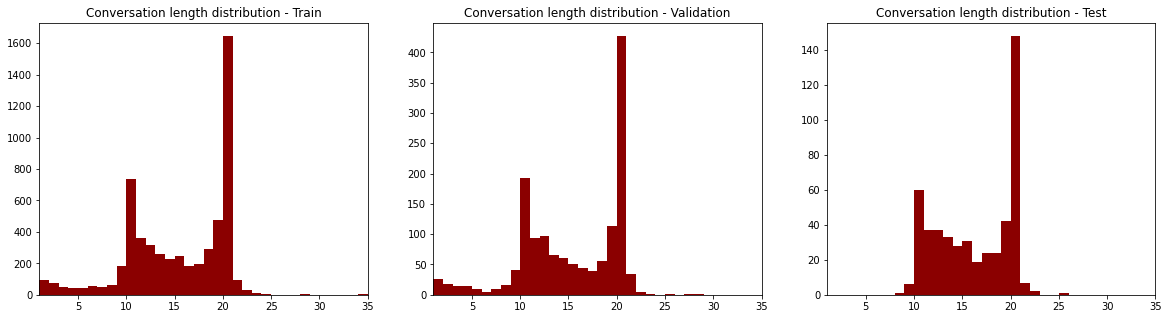

In [ ]:
QA_length_train = df_train.groupby(['id'])['question'].count()
QA_length_val = df_val.groupby(['id'])['question'].count()
QA_length_test = df_test.groupby(['id'])['question'].count()

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(QA_length_train, bins=range(1, 36), color='darkred')
plt.xlim((1, 35))
plt.title("Conversation length distribution - Train")
plt.subplot(1,3,2)
plt.hist(QA_length_val, bins=range(1, 36), color='darkred')
plt.xlim((1, 35))
plt.title("Conversation length distribution - Validation")
plt.subplot(1,3,3)
plt.hist(QA_length_test, bins=range(1, 36), color='darkred')
plt.xlim((1, 35))
plt.title("Conversation length distribution - Test")
plt.show()

From the histograms below can be seen that most of the passages contain between $200$ and $400$ number of words.

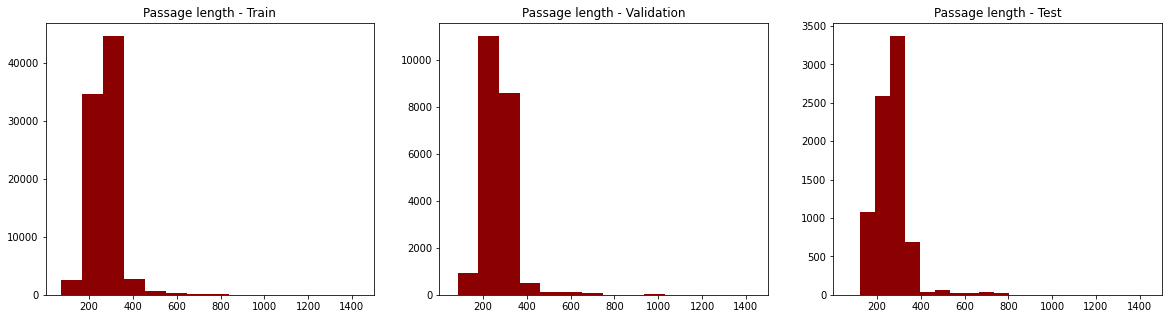

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(df_train['passage'].map(lambda x: len(str(x).split(" "))), color='darkred')
plt.xlim((1, 1500))
plt.title("Passage length - Train")

plt.subplot(1,3,2)
plt.hist(df_val['passage'].map(lambda x: len(str(x).split(" "))), color='darkred')
plt.xlim((1, 1500))
plt.title("Passage length - Validation")

plt.subplot(1,3,3)
plt.hist(df_test['passage'].map(lambda x: len(str(x).split(" "))), color='darkred')
plt.xlim((1, 1500))
plt.title("Passage length - Test")
plt.show()

When adding the history to passages, the correspondent total length distribution is shifted to the right compared to the previous ones, but most of the samples are still inside the range of [$200$, $400$] words.


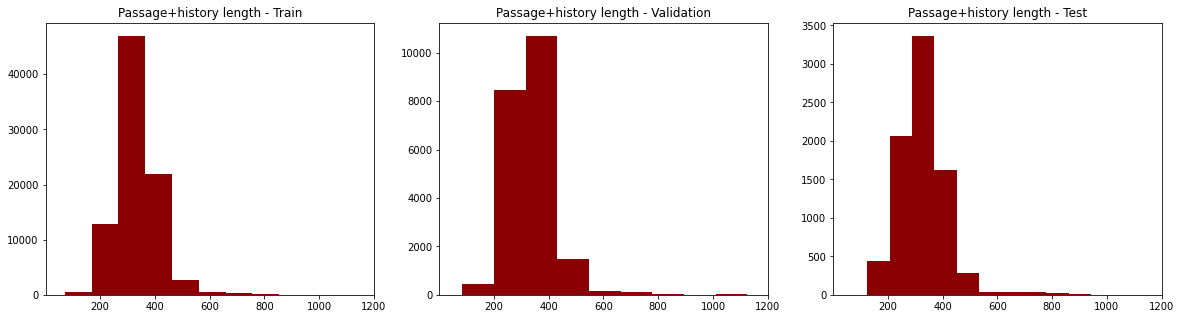

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(df_train['passage_history'].map(lambda x: len(str(x).split(" "))), color='darkred')
plt.xlim((1, 1200))
plt.title("Passage+history length - Train")

plt.subplot(1,3,2)
plt.hist(df_val['passage_history'].map(lambda x: len(str(x).split(" "))), color='darkred')
plt.xlim((1, 1200))
plt.title("Passage+history length - Validation")

plt.subplot(1,3,3)
plt.hist(df_test['passage_history'].map(lambda x: len(str(x).split(" "))), color='darkred')
plt.xlim((1, 1200))
plt.title("Passage+history length - Test")
plt.show()

For convenience reasons, let's convert each pandas `Dataframe` into a `Dataset`.

In [ ]:
dataset_train = Dataset.from_pandas(df_train)
dataset_val = Dataset.from_pandas(df_val)
dataset_test = Dataset.from_pandas(df_test)

# Models implementation

There are several approaches to implement transformer-based models for the question answering (QA) task, some of the most famous and used networks are:

*   **B**idirectional **E**ncoder **R**epresentations from **T**ransformers (**BERT**);
*   **R**obustly **O**ptimized **BERT** (**RoBERTa**).

They are both pre-trained transformer models that can be fine-tuned for a variety of natural language processing tasks, including question answering.

A key difference is the size and performance of the two models. RoBERTa is a larger model with more parameters, which allows it to achieve higher performance on a variety of tasks. However, this also means that it requires more computational resources and may be slower to train and fine-tune.
In summary, both BERT and RoBERTa are powerful models for natural language processing tasks, but RoBERTa is generally considered to be a stronger performer due to its more efficient training technique and larger model size. However, it may also be slower and more resource-intensive to train and fine-tune.

In this case, for computational reasons a smaller and lighter version of both model will be used:

*   BERTTiny, a smaller version of the original BERT model, with fewer parameters and a shallower architecture
*   DistilRoBERTa-base, a smaller, distilled version of the original RoBERTa model that has been "distilled" to have fewer parameters while still maintaining a good level of performance


To deal with the task to solve, the general approach is to define two different sequence-to-sequence transformer-based models, built using BERTTiny and DistilRoBERTa-base both as encoder and decoder.

For each type of model, two different versions are implemented:
* The baseline $f_\theta (Q,P)$, which receives as input a question *Q* concatenated with the text passage *P* and generates an answer *A*
* The history version $f_\theta (Q,P,H)$, which receives as input a question *Q* concatenated with the text passage *P* and the conversation history *H*, i.e. the set of questions and answers of previous turns, in descending temporal order, generating an answer *A*.

To have a benchmark against which to properly reason on models performances, for both types of models a third version (upper bound version) is implemented, which receives as input a question *Q* and the rationale *R* rather than the passage.


## Functions definition

The `define_model` function, through the `EncoderDecoderModel` class of [HuggingFace](https://huggingface.co/), loads the pre-trained model whose `model_name` is passed as input, and creates a Seq2Seq architecture setting it both as encoder and decoder. Then, the function makes use of the `tokenizer` for the special tokens configuration: the \[CLS\] token is set as decoder start token and \[SEP\] token as \[EOS\] token encoder. Finally, it specifies beam search decoding parameters.

In [ ]:
def define_model(model_name, tokenizer):

  """
  Loads the pre-trained weights of `model_name` into an encoder-decoder architecture and sets the desired configuration. Special tokens are set using `tokenizer` ones.
  """

  model = EncoderDecoderModel.from_encoder_decoder_pretrained(model_name, model_name)

  model.config.decoder.is_decoder = True
  model.config.decoder.add_cross_attention = True

  model.config.decoder_start_token_id = tokenizer.cls_token_id
  model.config.eos_token_id = tokenizer.sep_token_id
  model.config.pad_token_id = tokenizer.pad_token_id
  model.config.vocab_size = model.config.encoder.vocab_size

  model.config.max_length = 64
  model.config.min_length = 1
  model.config.no_repeat_ngram_size = 3
  model.config.early_stopping = True
  model.config.length_penalty = 2.0
  model.config.num_beams = 15

  return model

Before feeding the models, data must be tokenized and transformed in model inputs, using a proper tokenizer. BERT and RoBERTa encoders accept input sequences maximum $512$ tokens long, so it's important to check if at least the majority of $Q$+$P$ inputs fits this limit. Since questions contribute little to the total length of the input, let's focus on the passages length.

The `check_passage_answer_max_length` function computes the maximum passages length of the 95% of training passages. Since answers are used as labels during the training phase, they also need tokenization. Then, the function also provides the maximum answers length as to handle the $90$% of training answers.

In [ ]:
def check_passage_answer_max_length(tokenizer, df_train):

  """
  Computes the maximum passages length of the 95% of training passages and the maximum answers length as to handle the 90% of training answers.
  """

  passage_max_length = np.percentile(df_train.loc[:, ['passage']].applymap(lambda text: len(tokenizer(text).input_ids)), 95)
  answer_max_length = np.percentile(df_train.loc[:, ['answer']].applymap(lambda text: len(tokenizer(text).input_ids)), 90)

  print('Passage max length: ' + str(passage_max_length))
  print('Answer max length: ' + str(answer_max_length))

  return passage_max_length, answer_max_length

The `tokenize_function` is in charge of tokenizing and preparing the models inputs. Answers are tokenized as `labels`, while, depending on the model version, encoder `input_ids` are prepared in different ways:

* Baseline version → the tokenizer encodes the question $Q$ and the passage $P$, using special tokens: [CLS] $Q$ [SEP] $P$ [SEP]
* History version → the tokenizer encodes the question $Q$ and the passage $P$ concatenated with the history $H$, using special tokens: [CLS] $Q$ [SEP] $P$+$H$ [SEP]
* Upper bound version → the tokenizer encodes the question $Q$ and the rationale $R$, using special tokens: [CLS] $Q$ [SEP] $R$ [SEP]

In particular, encoder inputs and labels cannot exceed `encoder_max_length` and `decoder_max_length` respectively. Thus, sequences are truncated or padded accordingly.

Finally, in order to ignore the loss of labels padding, the correspondent `input_id` is set to $-100$.

In [ ]:
def tokenize_function(batch, history, upper_bound, encoder_max_length, decoder_max_length):

  """
  Transforms the `batch` of data into a batch of model inputs, by properly running a tokenization process. Eventual truncation is performed according to `encoder_max_length` and
  `decoder_max_length`. With `history=True` and `upper_bound=True`, input is prepared and tokenized as needed for the history and upper bound model versions respectively.
  """

  if history:
    inputs = tokenizer(batch["question"], batch['passage_history'], padding="max_length", truncation=True, max_length=encoder_max_length)
  elif upper_bound:
    inputs = tokenizer(batch["question"], batch['rationale'], padding="max_length", truncation=True, max_length=encoder_max_length)
  else:
    inputs = tokenizer(batch["question"], batch['passage'], padding="max_length", truncation=True, max_length=encoder_max_length)

  outputs = tokenizer(batch["answer"], padding="max_length", truncation=True, max_length=decoder_max_length)

  batch["input_ids"] = inputs.input_ids
  batch["attention_mask"] = inputs.attention_mask
  batch["labels"] = outputs.input_ids.copy()

  batch["labels"] = [[-100 if token == tokenizer.pad_token_id else token for token in labels] for labels in batch["labels"]]

  return batch

The `apply_tokenize_function` makes use of the `map` function to transform each training and validation batch into a batch of model inputs, by actually calling the `tokenize_function`. Then, it converts the tokenized data into PyTorch Tensors to be trained on GPU.

In [ ]:
def apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history, ub):

  """
  Applies a tokenization function to `dataset_train` and `dataset_val`, according to `history` and `ub` parameters.
  """

  train_tokenized = dataset_train.map(
    tokenize_function,
    batched=True,
    fn_kwargs = {'history' : history, 'upper_bound': ub, 'encoder_max_length': encoder_max_length, 'decoder_max_length': decoder_max_length},
    batch_size=batch_size,
    remove_columns=["question", "passage", "answer", 'history', 'passage_history', 'source', 'rationale', 'rationale_end']
  )

  val_tokenized = dataset_val.map(
      tokenize_function,
      batched=True,
      fn_kwargs = {'history' : history, 'upper_bound': ub, 'encoder_max_length': encoder_max_length, 'decoder_max_length': decoder_max_length},
      batch_size=batch_size,
      remove_columns=["question", "passage", "answer", 'history', 'passage_history', 'source', 'rationale', 'rationale_end']
  )

  train_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
  val_tokenized.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

  return train_tokenized, val_tokenized

The fine-tuning of models is carried out using the `Seq2SeqTrainer` method, which allows to perform generation during evaluation when `predict_with_generate` argument is set to `True` in `Seq2SeqTrainingArguments`. Then, the generated output is passed as predictions to the `compute_metric` function, which can compute on the validation set the desired metric.

Before starting the training, the `train_model` function configures the `Seq2SeqTrainingArguments`, by setting a $3$ epochs fine-tuning, using a linear scheduler with $10000$ warmup steps for the AdamW optimizer. Out of several experimental results, this setting was found to be the most effective. Then, `Seq2SeqTrainer` is runned on the tokenized training and validation sets and the model fine-tuning starts.

Fine-tuned model and weights are finally saved for later reload.


In [ ]:
def train_model(model, train_tokenized, val_tokenized, batch_size, save_path_local, save_path_drive, prediction_loss_only):

  """
  Fine-tunes the `model` on `train_tokenized` set, evaluating predictions on `val_tokenized`, and finally saves the best model to `save_path_local` and
  `save_path_drive`, locally and on drive respectively. If `prediction_loss_only = True`, when performing evaluation and generating predictions, it only returns the loss.
  """

  torch.cuda.empty_cache()

  training_args = Seq2SeqTrainingArguments(
      predict_with_generate=True,
      num_train_epochs=3,
      evaluation_strategy="epoch",
      save_strategy="epoch",
      per_device_train_batch_size=batch_size,
      per_device_eval_batch_size=batch_size,
      fp16=True,
      warmup_steps = 10000,
      output_dir="models",
      logging_steps=2,
      prediction_loss_only=prediction_loss_only,
      report_to = 'none',
      load_best_model_at_end = True)

  trainer = Seq2SeqTrainer(
      model=model,
      args=training_args,
      compute_metrics=compute_metric,
      train_dataset=train_tokenized,
      eval_dataset=val_tokenized)

  trainer.train()

  # Saving the model locally
  trainer.save_model(save_path_local)

  # Saving the model on drive
  trainer.save_model(save_path_drive)

The `compute_metric` function evaluates the model on the validation set using the SQuAD F1-score. In particular, it takes as input labels and predictions obtained with generation and decodes both of them. Since `squad.compute_f1` only computes the SQuAD F1-score between pairs of strings, the total one is computed as the average between the scores of all the *(prediction, label)* pairs.

In [ ]:
def compute_metric(pred):

    """
    Evaluates the model on the validation set using the SQuAD F1-score on `pred` predictions and labels.
    """

    labels_ids = pred.label_ids
    pred_ids = pred.predictions

    pred_str = tokenizer.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = tokenizer.pad_token_id
    label_str = tokenizer.batch_decode(labels_ids, skip_special_tokens=True)

    squad_score = np.mean([squad.compute_f1(pred_str[i], label_str[i]) for i in range(0,len(pred_str))])

    return {"f1_squad_score": squad_score}

The `generate_answers` function first tokenizes and transforms the desired dataset in model inputs. Truncation and padding are handled as for the `tokenize_function`. Then, it runs on the model the `generate` function, and after a decoding process the predicted answers are obtained.


In [ ]:
def generate_answers(batch, history, ub, model, encoder_max_length, decoder_max_length):

    """
    Transforms the `batch` of data into a batch of model inputs by a tokenization process and feeds the `model` for generating the predicted answers.
    Eventual truncation is performed according to `encoder_max_length` and `decoder_max_length`.
    With `history=True` and `upper_bound=True`, input is prepared and tokenized as needed for the history and upper bound model versions respectively.
    """

    if history:
      inputs = tokenizer(batch["question"], batch["passage_history"], padding="max_length", truncation=True, max_length=encoder_max_length, return_tensors="pt")
    elif ub:
      inputs = tokenizer(batch["question"], batch["rationale"], padding="max_length", truncation=True, max_length=encoder_max_length, return_tensors="pt")
    else:
      inputs = tokenizer(batch["question"], batch["passage"], padding="max_length", truncation=True, max_length=encoder_max_length, return_tensors="pt")

    input_ids = inputs.input_ids.to("cuda")
    attention_mask = inputs.attention_mask.to("cuda")

    outputs = model.generate(input_ids, attention_mask=attention_mask)

    output_str = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    batch["pred_answer"] = output_str

    return batch

The `apply_generate_answers` function makes use of the `map` function to obtain model's predicted answers for each question in the dataset passed as input.

In [ ]:
def apply_generate_answers(dataset, model, encoder_max_length, decoder_max_length, batch_size, history, ub):

  """
  Generates `model`'s predicted answer for each question in `dataset`.
  """

  results = dataset.map(generate_answers,
                        batched=True,
                        fn_kwargs = {'history' : history, 'ub' : ub, 'model': model, 'encoder_max_length': encoder_max_length, 'decoder_max_length': decoder_max_length},
                        batch_size=batch_size)

  return results

The `compute_f1_squad` function allows to evaluate models by computing the SQuAD F1-score on results obtained as the average between the SQuAD F1-score of all the *(predicted answer, true answer)* pairs.

In [ ]:
def compute_f1_squad(results):

  """
  Computes the SQuAD F1-score on `results`.
  """

  squad_score = np.mean([squad.compute_f1(results['pred_answer'][i], results['answer'][i]) for i in range(0,len(results['pred_answer']))])

  return squad_score

For loading saved fine-tuned models, the `reload_model` is used.

In [ ]:
def reload_model(path, model_name):

  """
  Loads from `path` the model whose `model_name` is passed as input.
  """

  model = EncoderDecoderModel.from_pretrained(path)
  model.to('cuda')
  tokenizer = AutoTokenizer.from_pretrained(model_name)

  return model, tokenizer

In order to visually compare predicted and true answers, `show_results` function can be used for printing the passage and the whole conversation of a specific `sample` of data.

In [ ]:
def show_results(results, sample):

  """
  Prints the text passage and the whole conversation of a specific `sample`, showing for each Q&A the predicted answer contained in `results`.
  """

  print(f"PASSAGE:\n")

  id = results['id'][sample]
  passage = results['passage'][sample]

  print(f"{passage}")
  print()

  print("CONVERSATION STRUCTURE:\n")

  for idx, row in results.iterrows():

    if(id == row['id']):
      question = row['question']
      answer = row['answer']
      pred_answer = row['pred_answer']

      print(f"Turn {idx+1}")
      print(f"Q: {question}")
      print(f"A: {answer}")
      print(f"PA: {pred_answer}")
      print()

    else:
      break

## BERTTiny models

The first model to be implemented is BERTTiny-based. Both its baseline and its history version are fine-tuned and evaluated using $3$ different seeds ($42$, $2022$, $1337$).

### Setup


Let's load the BERTTiny tokenizer from HuggingFace.
The generic tokenizer class `AutoTokenizer` allows to instantiate a predefined tokenizer hosted inside the pretrained model repo on HuggingFace. This can be done using the `from_pretrained` method and passing the pre-trained model name.

In [ ]:
bert_tiny = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(bert_tiny)
passage_max_length, answer_max_length = check_passage_answer_max_length(tokenizer, df_train)

Passage max length: 460.0
Answer max length: 9.0


Running the `check_passage_answer_max_length` function, it turns out that the maximum passages length of the $95$% of training passages is $460$. Then, the `encoder_max_length` can safely be set to the maximum number of tokens accepted in input by BERT encoders, which is $512$.
Also, the maximum answers length as to handle the $90$% of training answers is 9, which can be used as `decoder_max_length`.

In [ ]:
encoder_max_length = 512
decoder_max_length = int(answer_max_length)
batch_size = 16

After several experiments, the most effective `batch_size` was found to be $16$.

### $f_\theta(P, Q)$ implementation


#### Seed 42

Before training the model, it's important to set the reproducibility, in this case using a seed equal to $42$. Then the model is defined and the train and validation sets are tokenized.

In [ ]:
set_reproducibility(seed = 42)
bert2bert = define_model(bert_tiny, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

Let's fine-tune the BERTTiny model and save its weights after the training.


In [ ]:
train_model(bert2bert,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/bert-tiny_42',
            'drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_42',
            prediction_loss_only = False)

PyTorch: setting up devices
Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 in

Epoch,Training Loss,Validation Loss,F1 Squad Score
1,3.730300,3.637205,0.112784
2,3.184000,3.335953,0.141454
3,3.580000,3.252790,0.150279


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model/checkpoint-5364
Configuration saved in model/checkpoint-5364/config.json
Model weights saved in model/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNIN

The following code can be used to load the previously fine-tuned weights.

In [ ]:
bert2bert, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_42', bert_tiny)

Then, let's use the `apply_generate_answers` function to let the model generating predicted answers on the test set.


In [ ]:
bert2bert_results = apply_generate_answers(dataset_test, bert2bert, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
squad_score = compute_f1_squad(bert2bert_results)
print("The SQuAD F1-score on the test set is", squad_score)

The SQuAD F1-score on the test set is 0.14388569014890434


From the obtained results it can be seen that BERTTiny has really poor performances.

Finally, let's have a visual inspection of the predicted answers for a single passage.


In [ ]:
show_results(pd.DataFrame(data=bert2bert_results), 0)

PASSAGE:


CONVERSATION STRUCTURE:

Turn 1
Q: What color was Cotton?
A: white
PA: red

Turn 2
Q: Where did she live?
A: in a barn
PA: in the kitchen

Turn 3
Q: Did she live alone?
A: no
PA: yes

Turn 4
Q: Who did she live with?
A: with her mommy and 5 sisters
PA: his mother

Turn 5
Q: What color were her sisters?
A: orange and white
PA: red

Turn 6
Q: Was Cotton happy that she looked different than the rest of her family?
A: no
PA: no

Turn 7
Q: What did she do to try to make herself the same color as her sisters?
A: she painted herself
PA: he wanted to eat a dog

Turn 8
Q: Whose paint was it?
A: the farmer
PA: his mother

Turn 9
Q: What did Cotton's mother and siblings do when they saw her painted orange?
A: they started laughing
PA: a dog

Turn 10
Q: Where did Cotton's mother put her to clean the paint off?
A: a bucket of water
PA: in the kitchen

Turn 11
Q: What did the other cats do when Cotton emerged from the bucket of water?
A: licked her face
PA: a dog

Turn 12
Q: Did they want

#### Seed 2022

In [ ]:
set_reproducibility(seed = 2022)
bert2bert = define_model(bert_tiny, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
train_model(bert2bert,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/bert-tiny_2022',
            'drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_2022',
            prediction_loss_only = False)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss,F1 Squad Score
1,3.693900,3.602125,0.116535
2,3.166400,3.336388,0.144695
3,3.588000,3.251170,0.152582


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model/checkpoint-5364
Configuration saved in model/checkpoint-5364/config.json
Model weights saved in model/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNIN

In [ ]:
bert2bert, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_2022', bert_tiny)

In [ ]:
bert2bert_results = apply_generate_answers(dataset_test, bert2bert, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
squad_score = compute_f1_squad(bert2bert_results)
print("The SQuAD F1-score on the test set is", squad_score)

The SQuAD F1-score on the test set is 0.14978909467032372


Changing the seed does not highly influences the model's results.

In [ ]:
show_results(pd.DataFrame(data=bert2bert_results), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

#### Seed 1337

In [ ]:
set_reproducibility(seed = 1337)
bert2bert = define_model(bert_tiny, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
train_model(bert2bert,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/bert-tiny_1337',
            'drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_1337',
            prediction_loss_only=False)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss,F1 Squad Score
1,3.745900,3.640102,0.111210
2,3.197700,3.340055,0.142545
3,3.622800,3.253203,0.150962


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model/checkpoint-5364
Configuration saved in model/checkpoint-5364/config.json
Model weights saved in model/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNIN

In [ ]:
bert2bert, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_1337', bert_tiny)

In [ ]:
bert2bert_results = apply_generate_answers(dataset_test, bert2bert, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
squad_score = compute_f1_squad(bert2bert_results)
print("The SQuAD F1-score on the test set is", squad_score)

The SQuAD F1-score on the test set is 0.14828039654819314


Again, it can be noticed that training and evaluating the model with different seeds leads to the same poor performances.

In [ ]:
show_results(pd.DataFrame(data=bert2bert_results), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

### $f_\theta(P, Q, H)$ implementation


#### Seed 42

In [ ]:
set_reproducibility(seed = 42)
bert2bert_h = define_model(bert_tiny, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
train_model(bert2bert_h,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/bert-tiny_history_42',
            'drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_history_42',
            prediction_loss_only=False)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss,F1 Squad Score
1,3.736500,3.616460,0.119107
2,3.170800,3.341781,0.144172
3,3.588700,3.253925,0.151068


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to models/checkpoint-5364
Configuration saved in models/checkpoint-5364/config.json
Model weights saved in models/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WAR

In [ ]:
bert2bert_h, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_history_42', bert_tiny)

In [ ]:
bert2bert_h_results = apply_generate_answers(dataset_test, bert2bert_h, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
squad_score = compute_f1_squad(bert2bert_h_results)
print("The SQuAD F1-score on the test set is", squad_score)

The SQuAD F1-score on the test set is 0.14817783625390293


From the obtained results it can be seen that BERTTiny history version has very poor performances, really close to the baseline ones.

In [ ]:
show_results(pd.DataFrame(data=bert2bert_h_results), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

#### Seed 2022

In [ ]:
set_reproducibility(seed = 2022)
bert2bert_h = define_model(bert_tiny, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
train_model(bert2bert_h,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/bert-tiny_history_2022',
            'drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_history_2022',
            prediction_loss_only = False)

PyTorch: setting up devices
Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 in

Epoch,Training Loss,Validation Loss,F1 Squad Score
1,3.776600,3.685289,0.107246
2,3.184300,3.337252,0.143185
3,3.581400,3.253896,0.150533


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model_history/checkpoint-5364
Configuration saved in model_history/checkpoint-5364/config.json
Model weights saved in model_history/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings

In [ ]:
bert2bert_h, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_history_2022', bert_tiny)

In [ ]:
bert2bert_h_results = apply_generate_answers(dataset_test, bert2bert_h, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
squad_score = compute_f1_squad(bert2bert_h_results)
print("The SQuAD F1-score on the test set is", squad_score)

The SQuAD F1-score on the test set is 0.14840237583158428


Also in this case, the performances do not change when changing the seed.

In [ ]:
show_results(pd.DataFrame(data=bert2bert_h_results), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

#### Seed 1337

In [ ]:
set_reproducibility(seed = 1337)
bert2bert_h = define_model(bert_tiny, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
train_model(bert2bert_h,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/bert-tiny_history_1337',
            'drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_history_1337',
            prediction_loss_only = False)

PyTorch: setting up devices
Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 in

Epoch,Training Loss,Validation Loss,F1 Squad Score
1,3.776600,3.685289,0.104166
2,3.184300,3.337252,0.141192
3,3.581400,3.253896,0.150398


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model_history/checkpoint-5364
Configuration saved in model_history/checkpoint-5364/config.json
Model weights saved in model_history/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings

In [ ]:
bert2bert_h, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_history_1337', bert_tiny)

In [ ]:
bert2bert_h_results = apply_generate_answers(dataset_test, bert2bert_h, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
squad_score = compute_f1_squad(bert2bert_h_results)
print("The SQuAD F1-score on the test set is", squad_score)

The SQuAD F1-score on the test set is 0.14593499057851528


Again, a change in the seed does not influence the model performances.

Finally, it can be observed that the SQuAD F1-score is almost equivalent across different seeds and different versions of the model.

In [ ]:
show_results(pd.DataFrame(data=bert2bert_h_results), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

### Upper bound model

In [ ]:
set_reproducibility(seed = 1337)
bert2bert_ub = define_model(bert_tiny, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = False, ub = True)

In [ ]:
train_model(bert2bert_ub,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/bert-tiny_ub_1337',
            'drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_ub_1337',
            prediction_loss_only = False)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss,F1 Squad Score
1,3.441900,3.245790,0.141884
2,2.413300,2.448279,0.313950
3,2.797900,2.211749,0.376353


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to models_ub/checkpoint-5364
Configuration saved in models_ub/checkpoint-5364/config.json
Model weights saved in models_ub/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPREC

In [ ]:
bert2bert_ub, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/bert-tiny_ub_1337', bert_tiny)

In [ ]:
bert2bert_ub_results = apply_generate_answers(dataset_test, bert2bert_ub, encoder_max_length, decoder_max_length, batch_size, history = False, ub = True)

In [ ]:
squad_score = compute_f1_squad(bert2bert_ub_results)
print("The SQuAD F1-score on the test set is", squad_score)

The SQuAD F1-score on the test set is 0.37618301537664406


Performances are better than previous models, but still no satisfactory, showing that neither the upper bound model can reach really high results.


In [ ]:
show_results(pd.DataFrame(data=bert2bert_ub_results), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

## DistilRoBERTa models

Then, DistilRoBERTa-based model is implemented. As before, both its baseline and its history version are fine-tuned and evaluated using  3  different seeds ($42$, $2022$, $1337$).

### Setup

Let's load the DistilRoBERTa tokenizer from HuggingFace as done for BERTTiny model.

In [ ]:
distilroberta_name = "distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(distilroberta_name)
passage_max_length, answer_max_length = check_passage_answer_max_length(tokenizer, df_train)

Passage max length: 460.0
Answer max length: 9.0


Running the `check_passage_answer_max_length` function, this time using the DistilRoBERTa tokenizer, results appear to be the same as before. Then, the `encoder_max_length` can safely be set to the maximum number of tokens accepting in input by RoBERTa encoders, which is $512$, and 9 can be used as `decoder_max_length`.

In [ ]:
encoder_max_length = 512
decoder_max_length = int(answer_max_length)
batch_size = 16

The `batch_size` is set again equal to $16$.

### $f_\theta(P, Q)$ implementation

#### Seed 42

In [ ]:
set_reproducibility(seed = 42)
distilroberta = define_model(distilroberta_name, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
train_model(distilroberta,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/distilroberta_42',
            'drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_42',
            prediction_loss_only = True)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss
1,2.859300,3.000268
2,2.073400,2.141485
3,1.898500,1.750379


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model/checkpoint-5364
Configuration saved in model/checkpoint-5364/config.json
Model weights saved in model/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNIN

In [ ]:
distilroberta, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_42', distilroberta_name)

In [ ]:
distilroberta_results_val = apply_generate_answers(dataset_val, distilroberta, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
squad_score_val = compute_f1_squad(distilroberta_results_val)
print("The SQuAD F1-score on the validation set is", squad_score_val)

The SQuAD F1-score on the validation set is 0.5066541098857399


The evaluation on the validation set is done only at the end of the training for computational reasons.

In [ ]:
distilroberta_results_test = apply_generate_answers(dataset_test, distilroberta, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
squad_score_test = compute_f1_squad(distilroberta_results_test)
print("The SQuAD F1-scoreon the test set is", squad_score_test)

The SQuAD F1-score on the test set is 0.5186477342626427


From the obtained results on the test set it can be affirmed that the performances are much better than BERTTiny's, as there is a huge increment in the SQuAD F1-score.

In [ ]:
show_results(pd.DataFrame(data=distilroberta_results_test), 0)

PASSAGE:


CONVERSATION STRUCTURE:

Turn 1
Q: What color was Cotton?
A: white
PA: white

Turn 2
Q: Where did she live?
A: in a barn
PA: in a farm house

Turn 3
Q: Did she live alone?
A: no
PA: no

Turn 4
Q: Who did she live with?
A: with her mommy and 5 sisters
PA: Cotton

Turn 5
Q: What color were her sisters?
A: orange and white
PA: orange

Turn 6
Q: Was Cotton happy that she looked different than the rest of her family?
A: no
PA: yes

Turn 7
Q: What did she do to try to make herself the same color as her sisters?
A: she painted herself
PA: She painted her face

Turn 8
Q: Whose paint was it?
A: the farmer
PA: Cotton

Turn 9
Q: What did Cotton's mother and siblings do when they saw her painted orange?
A: they started laughing
PA: smiled her face

Turn 10
Q: Where did Cotton's mother put her to clean the paint off?
A: a bucket of water
PA: a bucket of water

Turn 11
Q: What did the other cats do when Cotton emerged from the bucket of water?
A: licked her face
PA: dropped into the hay b

#### Seed 2022

In [ ]:
set_reproducibility(seed = 2022)
distilroberta = define_model(distilroberta_name, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
train_model(distilroberta,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/distilroberta_2022',
            'drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_2022',
            prediction_loss_only = True)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss
1,2.785800,2.952650
2,2.178600,2.111102
3,1.924100,1.748275


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model/checkpoint-5364
Configuration saved in model/checkpoint-5364/config.json
Model weights saved in model/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNIN

In [ ]:
distilroberta, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_2022', distilroberta_name)

In [ ]:
distilroberta_results_val = apply_generate_answers(dataset_val, distilroberta, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
squad_score_val = compute_f1_squad(distilroberta_results_val)
print("The SQuAD F1-score on the validation set is", squad_score_val)

The SQuAD F1-score on the validation set is 0.5045086347069125


In [ ]:
distilroberta_results_test = apply_generate_answers(dataset_test, distilroberta, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
squad_score_test = compute_f1_squad(distilroberta_results_test)
print("The SQuAD F1-score on the test set is", squad_score_test)

The SQuAD F1-score on the test set is 0.5153232856305855


As for BERTTiny, a change in seed does not highly influence the model's results.  


In [ ]:
show_results(pd.DataFrame(data=distilroberta_results_test), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

#### Seed 1337

In [ ]:
set_reproducibility(seed = 1337)
distilroberta = define_model(distilroberta_name, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
train_model(distilroberta,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/distilroberta_1337',
            'drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_1337',
            prediction_loss_only=True)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss
1,2.919700,3.047958


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model/checkpoint-5364
Configuration saved in model/checkpoint-5364/config.json
Model weights saved in model/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WARNIN

Epoch,Training Loss,Validation Loss
1,2.919700,3.047958
2,2.046100,2.137752
3,1.930800,1.773598


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model/checkpoint-10728
Configuration saved in model/checkpoint-10728/config.json
Model weights saved in model/checkpoint-10728/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATION_WAR

In [ ]:
distilroberta, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_1337', distilroberta_name)

In [ ]:
distilroberta_results_val = apply_generate_answers(dataset_val, distilroberta, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
squad_score_val = compute_f1_squad(distilroberta_results_val)
print("The SQuAD F1-score on the validation set is", squad_score_val)

The SQuAD F1-score on the validation set is 0.5046266199690509


In [ ]:
distilroberta_results_test = apply_generate_answers(dataset_test, distilroberta, encoder_max_length, decoder_max_length, batch_size, history = False, ub = False)

In [ ]:
squad_score_test = compute_f1_squad(distilroberta_results_test)
print("The SQuAD F1-score on the test set is", squad_score_test)

The SQuAD F1-score on the test set is 0.5180209851322327


Again, it can be noticed that training and evaluating the model with different seeds leads to the same SQuAD F1-score on the test set.

In [ ]:
show_results(pd.DataFrame(data=distilroberta_results_test), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

### $f_\theta(P, Q, H)$ implementation

#### Seed 42

In [ ]:
set_reproducibility(seed = 42)
distilroberta_h = define_model(distilroberta_name, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
train_model(distilroberta_h,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/distilroberta_history_42',
            'drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_history_42',
            prediction_loss_only=True)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss
1,2.871600,3.076537
2,2.115000,1.886151
3,1.877000,1.461600


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model_history/checkpoint-5364
Configuration saved in model_history/checkpoint-5364/config.json
Model weights saved in model_history/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings

In [ ]:
distilroberta_h, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_history_42', distilroberta_name)

In [ ]:
distilroberta_h_results_val = apply_generate_answers(dataset_val, distilroberta_h, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
squad_score_val = compute_f1_squad(distilroberta_h_results_val)
print("The SQuAD F1-score on the validation set is", squad_score_val)

The SQuAD F1-score on the validation set is 0.584847622060626


In [ ]:
distilroberta_h_results_test = apply_generate_answers(dataset_test, distilroberta_h, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
squad_score_test = compute_f1_squad(distilroberta_h_results_test)
print("The SQuAD F1-score on the test set is", squad_score_test)

The SQuAD F1-score on the test set is 0.5977882571470061


The results on the test set show that the history version of the model performs better than the baseline, proving that feeding DistilRoBERTa with also conversation history information can have a positive impact.

In [ ]:
show_results(pd.DataFrame(data=distilroberta_h_results_test), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

#### Seed 2022

In [ ]:
set_reproducibility(seed = 2022)
distilroberta_h = define_model(distilroberta_name, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
train_model(distilroberta_h,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/distilroberta_history_2022',
            'drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_history_2022',
            prediction_loss_only=True)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss
1,2.861400,2.983907
2,2.126500,1.883478
3,1.916800,1.478960


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model_history/checkpoint-5364
Configuration saved in model_history/checkpoint-5364/config.json
Model weights saved in model_history/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings

In [ ]:
distilroberta_h, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_history_2022', distilroberta_name)

In [ ]:
distilroberta_h_results_val = apply_generate_answers(dataset_val, distilroberta_h, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
squad_score_val = compute_f1_squad(distilroberta_h_results_val)
print("The SQuAD F1-score on the validation set is", squad_score_val)

The SQuAD F1-score on the validation set is 0.5820381792702394


In [ ]:
distilroberta_h_results_test = apply_generate_answers(dataset_test, distilroberta_h, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
squad_score_test = compute_f1_squad(distilroberta_h_results_test)
print("The SQuAD F1-score on the test set is", squad_score_test)

The SQuAD F1-score on the test set is 0.5882844262239737


The seed seems again to not influence performances.

In [ ]:
show_results(pd.DataFrame(data=distilroberta_h_results_test), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

#### Seed 1337

In [ ]:
set_reproducibility(seed = 1337)
distilroberta_h = define_model(distilroberta_name, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
train_model(distilroberta_h,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/distilroberta_history_1337',
            'drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_history_1337',
            prediction_loss_only=True)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss
1,2.832400,2.917188
2,1.987400,1.882701
3,1.830700,1.479111


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model_history/checkpoint-5364
Configuration saved in model_history/checkpoint-5364/config.json
Model weights saved in model_history/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings

In [ ]:
distilroberta_h, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_history_1337', distilroberta_name)

In [ ]:
distilroberta_h_results_val = apply_generate_answers(dataset_val, distilroberta_h, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
squad_score_val = compute_f1_squad(distilroberta_h_results_val)
print("The SQuAD F1-score on the validation set is", squad_score_val)

The SQuAD F1-score on the validation set is 0.5831664601742995


In [ ]:
distilroberta_h_results_test = apply_generate_answers(dataset_test, distilroberta_h, encoder_max_length, decoder_max_length, batch_size, history = True, ub = False)

In [ ]:
squad_score_test = compute_f1_squad(distilroberta_h_results_test)
print("The SQuAD F1-score on the test set is", squad_score_test)

The SQuAD F1-score on the test set is 0.5944254256911093


As for the DistilRoBERTa baseline, performances are similar across different seeds.

In [ ]:
show_results(pd.DataFrame(data=distilroberta_h_results_test), 0)

PASSAGE:

Once upon a time, in a barn near a farm house, there lived a little white kitten named Cotton. Cotton lived high up in a nice warm place above the barn where all of the farmer's horses slept. But Cotton wasn't alone in her little home above the barn, oh no. She shared her hay bed with her mommy and 5 other sisters. All of her sisters were cute and fluffy, like Cotton. But she was the only white one in the bunch. The rest of her sisters were all orange with beautiful white tiger stripes like Cotton's mommy. Being different made Cotton quite sad. She often wished she looked like the rest of her family. So one day, when Cotton found a can of the old farmer's orange paint, she used it to paint herself like them. When her mommy and sisters found her they started laughing. 

"What are you doing, Cotton?!" 

"I only wanted to be more like you". 

Cotton's mommy rubbed her face on Cotton's and said "Oh Cotton, but your fur is so pretty and special, like you. We would never want you t

### Upper bound model

In [ ]:
set_reproducibility(seed = 42)
distilroberta_ub = define_model(distilroberta_name, tokenizer)
train_tokenized, val_tokenized = apply_tokenize_function(dataset_train, dataset_val, encoder_max_length, decoder_max_length, batch_size, history = False, ub = True)

In [ ]:
train_model(distilroberta_ub,
            train_tokenized,
            val_tokenized,
            batch_size,
            'models/distilroberta_ub_42',
            'drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_ub_42',
            prediction_loss_only = True)

Using cuda_amp half precision backend
The following columns in the training set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 85824
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 16092
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to tra

Epoch,Training Loss,Validation Loss
1,1.955400,1.806960
2,1.329900,1.130685
3,0.914500,0.875855


The following columns in the evaluation set don't have a corresponding argument in `EncoderDecoderModel.forward` and have been ignored: id. If id are not expected by `EncoderDecoderModel.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 21452
  Batch size = 16
Saving model checkpoint to model_ub/checkpoint-5364
Configuration saved in model_ub/checkpoint-5364/config.json
Model weights saved in model_ub/checkpoint-5364/pytorch_model.bin
/usr/local/lib/python3.8/dist-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py:533: FutureWarning: Version v4.12.0 introduces a better way to train encoder-decoder models by computing the loss inside the encoder-decoder framework rather than in the decoder itself. You may observe training discrepancies if fine-tuning a model trained with versions anterior to 4.12.0. The decoder_input_ids are now created based on the labels, no need to pass them yourself anymore.
  warnings.warn(DEPRECATI

In [ ]:
distilroberta_ub, tokenizer = reload_model('drive/MyDrive/Colab Notebooks/NLP/models/distilroberta_ub_42', distilroberta_name)

In [ ]:
distilroberta_ub_results = apply_generate_answers(dataset_test, distilroberta_ub, encoder_max_length, decoder_max_length, batch_size, history = False, ub = True)

In [ ]:
squad_score = compute_f1_squad(distilroberta_ub_results)
print("The SQuAD F1-score on the test set is", squad_score)

The SQuAD F1-score on the test set is 0.7433871277191999


Performances of the model are quite good. Also, they are significantly higher with respect to BERTTiny upper bound ones.

In [ ]:
show_results(pd.DataFrame(data=distilroberta_ub_results), 0)

PASSAGE:


CONVERSATION STRUCTURE:

Turn 1
Q: What color was Cotton?
A: white
PA: white

Turn 2
Q: Where did she live?
A: in a barn
PA: in a barn near a farm

Turn 3
Q: Did she live alone?
A: no
PA: no

Turn 4
Q: Who did she live with?
A: with her mommy and 5 sisters
PA: her mommy and 5 other sisters

Turn 5
Q: What color were her sisters?
A: orange and white
PA: orange

Turn 6
Q: Was Cotton happy that she looked different than the rest of her family?
A: no
PA: no

Turn 7
Q: What did she do to try to make herself the same color as her sisters?
A: she painted herself
PA: she used to paint herself like them

Turn 8
Q: Whose paint was it?
A: the farmer
PA: the old farmer's orange

Turn 9
Q: What did Cotton's mother and siblings do when they saw her painted orange?
A: they started laughing
PA: They started laughing

Turn 10
Q: Where did Cotton's mother put her to clean the paint off?
A: a bucket of water
PA: a bucket of water

Turn 11
Q: What did the other cats do when Cotton emerged from 

# Error Analysis

To better reason on errors causes, the two best baseline models per type are chosen and the analysis focuses on the $5$ hardest conversations per source, in which selected models mostly fail to answer questions.

## BERTTiny model

The best performance of BERTTiny model on the test set has been obtained with the seed $2022$. Thus, its results are analyzed.

For convenience reasons, `bert2bert_results` dataset is first converted into a `Dataframe`.

In [ ]:
bert2bert_results = pd.DataFrame(bert2bert_results)

Then, let's compute the SQuAD F1-score on each Q&A pair and store the results.

In [ ]:
bert2bert_results['f1_squad'] = bert2bert_results.apply(lambda x: squad.compute_f1(x.pred_answer, x.answer), axis=1)
bert2bert_results.head()

,id,source,passage,question,answer,history,passage_history,rationale,rationale_end,__index_level_0__,pred_answer,f1_squad
0,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",What color was Cotton?,white,,"Once upon a time, in a barn near a farm house,...",a little white kitten named Cotton,93,0,black and white,0.500000
1,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",Where did she live?,in a barn,What color was Cotton? white.,"Once upon a time, in a barn near a farm house,...","in a barn near a farm house, there lived a lit...",80,1,in the kitchen,0.500000
2,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",Did she live alone?,no,Where did she live? in a barn. What color was ...,"Once upon a time, in a barn near a farm house,...",Cotton wasn't alone,215,2,no,1.000000
3,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",Who did she live with?,with her mommy and 5 sisters,Did she live alone? no. Where did she live? in...,"Once upon a time, in a barn near a farm house,...",with her mommy and 5 other sisters,315,3,her mother,0.250000
4,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",What color were her sisters?,orange and white,Who did she live with? with her mommy and 5 si...,"Once upon a time, in a barn near a farm house,...",her sisters were all orange with beautiful whi...,490,4,black and white,0.666667


After grouping all passages by `source`, they are sorted by SQuAD F1-score, computed as the average of all SQuAD F1-scores of related Q&A pairs. Then, the $5$ hardest conversations per source, i.e. those with the lower score, are extracted.

In [ ]:
worst_5_passages = bert2bert_results.groupby(['source', 'id'],
                                             as_index=False).mean().drop(['rationale_end', '__index_level_0__'],
                                                                         axis = 1).sort_values(['source','f1_squad']).groupby(['source']).head(5)
worst_5_passages

,source,id,f1_squad
42,cnn,3gu1kf0o4i11dq9wdl6yo829jv9pbz,0.0
52,cnn,3jwh6j9i9sd1a5xjx6t6kjxekv8bnk,0.0
59,cnn,3lya37p8iqn02zcg0t1qsrgaqutkb2,0.0
68,cnn,3p59jyt76lk5h527b9m7sp02f2n2t6,0.0
88,cnn,3y54sxro1lle1hb9utwdy8vuyvituv,0.0
107,gutenberg,34z02eimisdylvztwmit917niam0tf,0.0
128,gutenberg,3cp1to84pt13w3rhad49p9uoz2c25w,0.0
131,gutenberg,3efvcay5l39mph8rfwh40aqw343j88,0.0
137,gutenberg,3h0w84iwbk2kw61v04cdub89nc4ere,0.0
139,gutenberg,3jw0ylfxrtgjl248kygp3gnqn7oww4,0.0


Due to poor results of BERTTiny, the $5$ hardest conversation per source all show a $0$ SQuAD F1-score.

Let's print all the $25$ conversations extracted, in order to better visualize the model behavior.

In [ ]:
sources = list(worst_5_passages['source'].unique())
sources

['cnn', 'gutenberg', 'mctest', 'race', 'wikipedia']

In [ ]:
def show_worst_5_passages_per_source(source, results, history, results_h = None):

  """
  Prints the 5 worst `source` passages, by visualizing for each Q&A pair the predicted answer contained in `results`.
  If `history = True`, the function also shows the predicted answer contained in `results_h`.
  """

  worst_5_passages_source = worst_5_passages[worst_5_passages['source'] == source]
  id_passage = 1

  print(f"#####################  {source.upper()}  #####################\n")
  for _, r in worst_5_passages_source.iterrows():

    source = r['source']
    id = r['id']

    if id_passage > 1:
      print("------"*50)

    print(f"\nPASSAGE {id_passage}:\n")

    id_passage+=1
    print(list(results[results['id'] == id]['passage'])[0])

    print("\n\nCONVERSATION:\n")

    for idx, row in results.iterrows():
      if(id == row['id']):
        question = row['question']
        answer = row['answer']
        pred_answer = row['pred_answer']
        rationale = row['rationale']

        print(f"Q: {question}")
        print(f"A: {answer}")
        print(f"R: {rationale}")
        print(f"PA: {pred_answer}")
        if history:
          pred_answers_h = results_h[results_h['id'] == id]
          for idx_h, row_h in pred_answers_h.iterrows():
            if row_h['question'] == question and row_h['answer'] == answer:
              print(f"PA_H: {row_h['pred_answer']}")


        print()

In [ ]:
show_worst_5_passages_per_source('cnn', bert2bert_results, history = False)

#####################  CNN  #####################


PASSAGE 1:

Dennis Rodman says he's not a diplomat, just a former NBA star fighting addiction and trying to be a better father. 

But that hasn't kept him from becoming embroiled, even if unintentionally, in U.S.-North Korea relations. 

His apparent chumminess with North Korea's leader has been controversial, as have previous proclamations that Kim Jong Un is a "nice guy." 

Rodman said he simply does not know enough about the allegations of abuse and authoritarianism that Kim is reviled for. 

"I keep telling people, I'm not there to be an ambassador to try to figure out why (is Kim) doing all these things? That's not my job," Rodman told CNN's Chris Cuomo on "New Day" Friday. 

It was his first interview since entering an alcohol rehabilitation facility two weeks ago. 

The former basketball player is probably the American with the most access to the North Korean leader, and many have been critical that he has not lobbied for the r

In [ ]:
show_worst_5_passages_per_source('gutenberg', bert2bert_results, history = False)

#####################  GUTENBERG  #####################


PASSAGE 1:

CHAPTER XXVI 

THE JUDGMENT OF DOMITIAN 

Two hours had gone by and Caleb, with fury in his heart, sat brooding in the office attached to the warehouse that he had hired. At that moment he had but one desire--to kill his successful rival, Marcus. Marcus had escaped and returned to Rome; of that there could be no doubt. He, one of the wealthiest of its patricians, had furnished the vast sum which enabled old Nehushta to buy the coveted Pearl-Maiden in the slave-ring. Then his newly acquired property had been taken to this house, where he awaited her. This then was the end of their long rivalry; for this he, Caleb, had fought, toiled, schemed and suffered. Oh! rather than such a thing should be, in that dark hour of his soul, he would have seen her cast to the foul Domitian, for Domitian, at least, she would have hated, whereas Marcus, he knew, she loved. 

Now there remained nothing but revenge. Revenged he must be, b

In [ ]:
show_worst_5_passages_per_source('mctest', bert2bert_results, history = False)

#####################  MCTEST  #####################


PASSAGE 1:

Once upon a time, there was a squirrel named Joey. Joey loved to go outside and play with his cousin Jimmy. Joey and Jimmy played silly games together, and were always laughing. One day, Joey and Jimmy went swimming together at their Aunt Julie's pond. Joey woke up early in the morning to eat some food before they left. He couldn't find anything to eat except for pie! Usually, Joey would eat cereal, fruit (a pear), or oatmeal for breakfast. After he ate, he and Jimmy went to the pond. On their way there they saw their friend Jack Rabbit. They dove into the water and swam for several hours. The sun was out, but the breeze was cold. Joey and Jimmy got out of the water and started walking home. Their fur was wet, and the breeze chilled them. When they got home, they dried off, and Jimmy put on his favorite purple shirt. Joey put on a blue shirt with red and green dots. The two squirrels ate some food that Joey's mom, Jasmi

In [ ]:
show_worst_5_passages_per_source('race', bert2bert_results, history = False)

#####################  RACE  #####################


PASSAGE 1:

Tom Brennan was working in a Philadelphia office building when he noticed a black bag. The bag contained a book. This chance discovery ended a 12-day search by the Library Company of Philadelphia for a historical treasure - a 120-page diary kept 190 years ago by Deborah Logan, "a woman who knew everybody in her day," James Green, the librarian told the magazine American Libraries. Most of the diary is a record of big events in Philadelphia. It also includes a description of British soldiers burning Washington, D.C. in the war of 1812. She describes President James Madison on horseback as "perfectly shaking with fear" during the troubled days. George Washington, she writes, mistook her for the wife of a French man, and praised her excellent English. The adventure of the lost book began September 4 when Cory Luxmoore arrived from England to deliver the diary of his ancestor to the Library Company, which he and his wife cons

In [ ]:
show_worst_5_passages_per_source('wikipedia', bert2bert_results, history = False)

#####################  WIKIPEDIA  #####################


PASSAGE 1:

Providence is the capital of and most populous city in the U.S. state of Rhode Island, founded in 1636 and one of the oldest cities in the United States. It was founded by Roger Williams, a religious exile from the Massachusetts Bay Colony. He named the area in honor of "God's merciful Providence" which he believed was responsible for revealing such a haven for him and his followers to settle. The city is situated at the mouth of the Providence River at the head of Narragansett Bay. 

Providence was one of the first cities in the country to industrialize and became noted for its textile manufacturing and subsequent machine tool, jewelry, and silverware industries. Today, the city of Providence is home to eight hospitals and seven institutions of higher learning which have shifted the city's economy into service industries, though it still retains some manufacturing activity. The city was once nicknamed the "Beehive o

By looking at predicted answers, it can be noticed that BERTTiny tends to predict wrong and non-contextualized responses. However, even when missing the correct answer, in most of the cases predict something at least plausible, as it was able to recognize the question type and coherently answer to interrogative adverbs/pronouns like *Where* or *Who* with an actual place or person respectively.

## DistilRoBERTa model

The best performance of DistilRoBERTa model on the test set has been obtained with the seed $42$. Thus, its results are analyzed.

Again, `distilroberta_results_test` dataset is first converted into a `Dataframe`.

In [ ]:
distilroberta_results = pd.DataFrame(distilroberta_results_test)

Then, let's compute the SQuAD F1-score on each Q&A pair and store the results.

In [ ]:
distilroberta_results['f1_squad'] = distilroberta_results.apply(lambda x: squad.compute_f1(x.pred_answer, x.answer), axis=1)
distilroberta_results.head()

,id,source,passage,question,answer,history,passage_history,rationale,rationale_end,__index_level_0__,pred_answer,f1_squad
0,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",What color was Cotton?,white,,"Once upon a time, in a barn near a farm house,...",a little white kitten named Cotton,93,0,white,1.0
1,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",Where did she live?,in a barn,What color was Cotton? white.,"Once upon a time, in a barn near a farm house,...","in a barn near a farm house, there lived a lit...",80,1,in a barn,1.0
2,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",Did she live alone?,no,Where did she live? in a barn. What color was ...,"Once upon a time, in a barn near a farm house,...",Cotton wasn't alone,215,2,no,1.0
3,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",Who did she live with?,with her mommy and 5 sisters,Did she live alone? no. Where did she live? in...,"Once upon a time, in a barn near a farm house,...",with her mommy and 5 other sisters,315,3,Cotton,0.0
4,3dr23u6we5exclen4th8uq9rb42tel,mctest,"Once upon a time, in a barn near a farm house,...",What color were her sisters?,orange and white,Who did she live with? with her mommy and 5 si...,"Once upon a time, in a barn near a farm house,...",her sisters were all orange with beautiful whi...,490,4,orange,0.5


Again, the $5$ hardest conversations per source are extracted.

In [ ]:
worst_5_passages = distilroberta_results.groupby(['source', 'id'],
                                                 as_index=False).mean().drop(['rationale_end', '__index_level_0__'],
                                                                             axis = 1).sort_values(['source','f1_squad']).groupby(['source']).head(5)
worst_5_passages

,source,id,f1_squad
94,cnn,3z2r0dq0jhe3smkalexct301crj2ex,0.066667
88,cnn,3y54sxro1lle1hb9utwdy8vuyvituv,0.250000
30,cnn,3cfjtt4sxtqmusj2n94ya9f1f0f7iu,0.284330
62,cnn,3nc5l260mom9579b3nffiyo4px4ofh,0.288810
16,cnn,35bldd71i6xa08985bv0giyuwn3zv9,0.295000
107,gutenberg,34z02eimisdylvztwmit917niam0tf,0.092593
124,gutenberg,3b4yi393v9wx746qgown92hkbf4ssa,0.224091
123,gutenberg,3azhrg4cu4ktme1zh7c2ro3po9a30y,0.255615
172,gutenberg,3strjbfxowr0yl6x0fsbslmwvuztks,0.298674
138,gutenberg,3ihr8nyam71hsrony6wbguw3agap42,0.299232


This time, SQuAD F1-score of the hardest conversations are all within a range of $[0.02$, $0.3]$ and they are very similar across different sources.

Since the baseline and the history version of DistilRoBERTa obtained different SQuAD F1-score on the test set, it might be meaningful to compare their performances on the $5$ worst passages per source extracted for the baseline model.

In [ ]:
distilroberta_h_results = pd.DataFrame(distilroberta_h_results_test)
distilroberta_h_results['f1_squad_h'] = distilroberta_h_results.apply(lambda x: squad.compute_f1(x.pred_answer, x.answer), axis=1)

worst_5_passages_h = distilroberta_h_results.groupby(['id'], as_index=False).mean().drop(['rationale_end', '__index_level_0__'], axis = 1)
df_merge = pd.merge(worst_5_passages, worst_5_passages_h, how = 'left', on = 'id')
df_merge

,source,id,f1_squad,f1_squad_h
0,cnn,3z2r0dq0jhe3smkalexct301crj2ex,0.066667,0.122222
1,cnn,3y54sxro1lle1hb9utwdy8vuyvituv,0.250000,0.374339
2,cnn,3cfjtt4sxtqmusj2n94ya9f1f0f7iu,0.284330,0.528034
3,cnn,3nc5l260mom9579b3nffiyo4px4ofh,0.288810,0.511667
4,cnn,35bldd71i6xa08985bv0giyuwn3zv9,0.295000,0.473333
5,gutenberg,34z02eimisdylvztwmit917niam0tf,0.092593,0.259019
6,gutenberg,3b4yi393v9wx746qgown92hkbf4ssa,0.224091,0.448571
7,gutenberg,3azhrg4cu4ktme1zh7c2ro3po9a30y,0.255615,0.562255
8,gutenberg,3strjbfxowr0yl6x0fsbslmwvuztks,0.298674,0.300298
9,gutenberg,3ihr8nyam71hsrony6wbguw3agap42,0.299232,0.372371


It can be clearly noticed that in all the $25$ passages, the history version of DistilRoBERTa performs better. This is probably due to the fact that half of CoQA questions refers back to the conversation history, thus the model which takes into account the dialogue previous turns is more facilitated.

In [ ]:
sources = list(worst_5_passages['source'].unique())
sources

['cnn', 'gutenberg', 'mctest', 'race', 'wikipedia']

Let's again visually inspect the worst passages, including both the answers predicted from the baseline and the ones predicted from the history version.

In [ ]:
show_worst_5_passages_per_source('cnn', distilroberta_results, history = True, results_h = distilroberta_h_results)

#####################  CNN  #####################


PASSAGE 1:

(CNN) -- There are plenty of country songs about how to be a man. One way is to face the music, and two country crooners did that on Thursday. 

Ty Herndon and Billy Gilman came out as being gay. 

Herdon went first, in interviews with People Magazine and Entertainment Tonight. His revelation inspired Gilman to do go public as well. 

Gilman posted a message to YouTube, thanking Herndon for breaking the ice. He preferred telling his fans directly, from the comfort of home, to sitting down with the press, he said. 

But an encounter with a journalist also prodded him to spill the beans before someone else did. The reporter bumped into Gilman in a public place and snapped a photo of him -- with his partner. 

"It was in that moment that I knew that I'd rather it be from me than you reading it somewhere else," Gilman told fans. He also feared being ripped over his sexuality in an article. 

Country and LGBTQ 

In the genre of

In [ ]:
show_worst_5_passages_per_source('gutenberg', distilroberta_results, history = True, results_h = distilroberta_h_results)

#####################  GUTENBERG  #####################


PASSAGE 1:

CHAPTER XXVI 

THE JUDGMENT OF DOMITIAN 

Two hours had gone by and Caleb, with fury in his heart, sat brooding in the office attached to the warehouse that he had hired. At that moment he had but one desire--to kill his successful rival, Marcus. Marcus had escaped and returned to Rome; of that there could be no doubt. He, one of the wealthiest of its patricians, had furnished the vast sum which enabled old Nehushta to buy the coveted Pearl-Maiden in the slave-ring. Then his newly acquired property had been taken to this house, where he awaited her. This then was the end of their long rivalry; for this he, Caleb, had fought, toiled, schemed and suffered. Oh! rather than such a thing should be, in that dark hour of his soul, he would have seen her cast to the foul Domitian, for Domitian, at least, she would have hated, whereas Marcus, he knew, she loved. 

Now there remained nothing but revenge. Revenged he must be, b

In [ ]:
show_worst_5_passages_per_source('mctest', distilroberta_results, history = True, results_h = distilroberta_h_results)

#####################  MCTEST  #####################


PASSAGE 1:

David and Lucy waited in their mom's truck. They all were going to the circus to see the clowns. Their Mom had to take their little brother back into the house to get more diapers and go to the bathroom. David was worried because he did not want to miss the wolf clown. Lucy watched her brother rub his chin. "Why are you looking out the window?" she asked. "Mom needs to hurry. We might miss the clowns." "I am going to get out of the truck and draw triangles in the sand." Lucy said. "No! You might make us miss it." David cried. Before she could get out of the truck Lucy saw her mom and little brother walk out of the house. Her mom got in the truck and asked, "Okay kids are we ready to go?" David and Lucy yelled, "Yes!" When they got to the circus David and Lucy saw all the clowns. Their little brother was too young to go into the tent, so their mom stayed with him. The show ended and they walked to the truck. "What do you

In [ ]:
show_worst_5_passages_per_source('race', distilroberta_results, history = True, results_h = distilroberta_h_results)

#####################  RACE  #####################


PASSAGE 1:

Many of us use them several times a day without really noticing.And yet the way we in lifts,or elevators as they are known in the US,reveals a hidden anxiety. 

Passengers seem to know instinctively how to arrange themselves in an elevator,like the dots on a die.With each additional passenger, the bodies shift,going into the open spaces. 

On your own,you can do whatever you want--it's your own little box.If there are two of you,you take different corners, creating the greatest distance. When a third person enters, you will unconsciously form a triangle .And when there is a square, with someone I every corner.A fifth person is probable going to have to stand in the middle. 

Why are we so awkward in lifts? 

"You don't have enough space," says Professor Babette Renneberg, a clinical psychologist at the Free University of Berlin."Usually when we meet other people we have about an arm's length of distance between us. And th

In [ ]:
show_worst_5_passages_per_source('wikipedia', distilroberta_results, history = True, results_h = distilroberta_h_results)

#####################  WIKIPEDIA  #####################


PASSAGE 1:

A thorough understanding of adolescence in society depends on information from various perspectives, including psychology, biology, history, sociology, education, and anthropology. Within all of these perspectives, adolescence is viewed as a transitional period between childhood and adulthood, whose cultural purpose is the preparation of children for adult roles. It is a period of multiple transitions involving education, training, employment and unemployment, as well as transitions from one living circumstance to another. 

Puberty occurs through a long process and begins with a surge in hormone production, which in turn causes a number of physical changes. It is the stage of life characterized by the appearance and development of secondary sex characteristics (for example, a deeper voice and larger adam's apple in boys, and development of breasts and more curved and prominent hips in girls) and a strong shift in ho

It's interesting to notice that also DistilRoBERTa model, even when missing the correct answer, in most of the cases it's able to predict something at least plausible, showing the capability to understand the question type and answer coherently.

Also, the model shows to really predict passage-related answers and it can be observed that among all different question types, it finds it easier to answer to lexical matches and paraphrasing than pragmatics ones, as the former contain explicit or implicit clues on what portion of the passage the question relates to, while the latter require a common sense knowledge to answer properly.

In addition, it emerges that DistilRoBERTa history version performs better than the baseline on questions which refer back to conversational history.

## Effects of passages truncation analysis

The $512$ input tokens limit required by the models forces the truncation of longer passages, sometimes excluding key portions of text. Then, let's check which kind of impact this phenomenon may have.

In [ ]:
def truncation_rationale(df):

    """
    Returns a dictionary {passage_id : Q&A_pairs_ids}, where the Q&A_pairs_ids is a list of Q&A ids whose rationale has been truncated because of the 512 tokens limit
    and the passage_id is the id of Q&A pairs related passage. It also returns the total number of Q&A pairs whose rationale suffers from truncation.
    """

    max_length = 512
    questions_per_passage = []
    dict_passage_questions = {}
    last_id = ''
    n_truncated = 0

    for idx, row in df.iterrows():

      passage_till_rationale = row['passage'][:row['rationale_end']]
      length = len(passage_till_rationale.split(" "))

      if length > max_length:
        n_truncated += 1

        if last_id != row['id']:
          last_id  = row['id']
          questions_per_passage = []

        questions_per_passage.append(row['question'])
        dict_passage_questions[last_id] = questions_per_passage

    return dict_passage_questions, n_truncated


dict_passage_questions_train, n_truncated_train = truncation_rationale(df_train)
dict_passage_questions_val, n_truncated_val = truncation_rationale(df_val)
dict_passage_questions_test, n_truncated_test = truncation_rationale(df_test)

In [ ]:
print("The number of train Q&A pairs whose passage has been truncated before the rationale end is " + str(n_truncated_train))
print("The number of validation Q&A pairs whose passage has been truncated before the rationale end is " + str(n_truncated_val))
print("The number of test Q&A pairs whose passage has been truncated before the rationale end is " + str(n_truncated_test))

The number of train Q&A pairs whose passage has been truncated before the rationale end is 83
The number of validation Q&A pairs whose passage has been truncated before the rationale end is 38
The number of test Q&A pairs whose passage has been truncated before the rationale end is 14


It could be interesting to compute, for each passage whose Q&A pairs are affected by rationale truncation, which percentage of the whole conversation those turns cover.

In [ ]:
def show_truncation_percentage(df, dict_passage_questions):

  """
  For each passage in `dict_passage_questions`, it computes the percentage of related Q&A pairs whose rationale suffers from truncation.
  """

  df_truncation = df.groupby(['id', 'passage'], as_index=False).mean().drop(['rationale_end'], axis = 1)
  df_truncation['truncation_percentage'] = np.zeros(df_truncation.shape[0])

  for id_passage, questions in dict_passage_questions.items():

    passage = df[df['id']==id_passage]
    percentage_truncation = int(np.round(len(questions)/passage.shape[0]*100))
    df_truncation.loc[df_truncation['id'] == id_passage, 'truncation_percentage'] = str(percentage_truncation) + '%'

  return df_truncation

In [ ]:
df_truncation_train = show_truncation_percentage(df_train, dict_passage_questions_train)
df_truncation_train[df_truncation_train['truncation_percentage'] != 0]

,id,passage,truncation_percentage
96,30lb5cdzncau778s2e7bvp843w70za,Billie Holiday was an American jazz singer and...,100%
455,32zkvd547fnu6149fn9rb5z8f63b3a,Old Behrman was a painter who lived on the gro...,6%
678,33ppungg385i71srwrqqfl9rcnyrzt,Scrooge looked around him angrily. It was Chri...,25%
767,34hjijklp5wuxbljki5ammllwxf4vs,A disheveled man appeared in court Thursday on...,13%
1111,36wlnqg78zaxgzk647qnuw356vdebo,ROME: The legend of Leonardo da Vinci is cover...,10%
1340,38f71oa9gtwl54ozq702quzzuubmfg,"Not so long ago, most people didn't know who S...",30%
1341,38f71oa9gtwl54ozq702quzzuvxmf4,The revolution was over by the time Tom Ford s...,6%
1416,39ghhavomfrl6glp3trrjyar1bu4jv,Old Behrman was a painter who lived on the gro...,20%
1491,39o5d9o87tsdg6wftn5mmp5qxq13c5,Mark Twain has been called the inventor of the...,19%
1738,3befod78w6tb7ora6q4jzq285414m9,Consult the page adapted from an English dicti...,10%


In [ ]:
df_truncation_val = show_truncation_percentage(df_val, dict_passage_questions_val)
df_truncation_val[df_truncation_val['truncation_percentage'] != 0]

,id,passage,truncation_percentage
39,3137onmdkg5t7gshkti1v7u2m7uegs,Tom appeared on the sidewalk with a bucket of ...,20%
223,34z02eimisdylvztwmit917ni1j0tu,Colleges taking another look at value of merit...,26%
512,3dbqwde4y6yzlpgaww2thxxmaq55ne,It never occurred to Sun Yukun that the decisi...,6%
788,3kibxj1wd5uklt1p4y6cybg9xrnkod,"Buck did not read the newspapers,or he would h...",11%
882,3mx2nq3yc9u4xjuey2p2fzokc4y5xh,"After much thought,I came up with a brilliant ...",30%
1013,3q5c1wp23m1w7i9lr94vkqkj7p1517,Doctor Manette had suddenly disappeared. Every...,18%
1141,3strjbfxowr0yl6x0fsbslmwwz5kt0,The Chinese put up with a lot living in the wo...,5%
1200,3u0srxb7cd5oqce8t3fwky2i28trnd,"Caught in the Web A few months ago, it wasn't ...",46%
1294,3wleiwsyhohfcwbcbf5ie6xe45ch2p,What Is Today's American Dream \n\nThey may no...,40%
1353,3y5140z9dxgb0yn2jvyfav6mfrupim,"British writer John Bunyan was born at Elstow,...",10%


In [ ]:
df_truncation_test = show_truncation_percentage(df_test, dict_passage_questions_test)
df_truncation_test[df_truncation_test['truncation_percentage'] != 0]

,id,passage,truncation_percentage
36,33cusnvvnncx50c8oskdbkhinmz88p,My trip with my sister and my daughter to Manh...,10%
57,34z02eimisdylvztwmit917ni020tb,"When I was young, I went looking for gold in C...",5%
94,37m28k1j0qd08516cu1iw1wrtkcajw,"As we drove along, my spirits went up again, a...",20%
314,3p59jyt76lk5h527b9m7sp02fzkt2o,"Register in person, by phone 264-8833, or by m...",10%
431,3w92k5rlwuhctupjynokrerzwu05vq,The Board Meeting had come to an end. Bob star...,25%


It's also meaningful to observe that among the $25$ test passages with the worst SQuAD F1-score, according to DistilRoBERTa performances, for two of them the truncation cut out the rationale of at least one of their Q&A pairs.

In [ ]:
print("Among the 25 test passages with the worst SQuAD F1-score, for",
      list(set(dict_passage_questions_test.keys()).intersection(list(worst_5_passages['id']))),
      "ones\nthe truncation cut out the rationale of at least one of their Q&A pairs.")

Among the 25 test passages with the worst SQuAD F1-score, for ['3p59jyt76lk5h527b9m7sp02fzkt2o', '37m28k1j0qd08516cu1iw1wrtkcajw']
 ones the truncation cut out the rationale of at least one of their Q&A pairs.


Finally, let's see how models perform on truncated passages.

In [ ]:
def correlation_f1_truncation(df_truncation, results):

  """
  For each passage contained in `df_truncation` computes the SQuAD F1-score, according to `results`.
  """

  df_grouped_results = results.groupby(['id'], as_index=False).mean().drop(['rationale_end', '__index_level_0__'], axis = 1)
  df_merged = pd.merge(df_truncation, df_grouped_results, how='left', on = 'id')

  return df_merged

In [ ]:
df_f1_truncation = correlation_f1_truncation(df_truncation_test, bert2bert_results)
df_f1_truncation[df_f1_truncation['truncation_percentage'] != 0.0]

,id,passage,truncation_percentage,f1_squad
36,33cusnvvnncx50c8oskdbkhinmz88p,My trip with my sister and my daughter to Manh...,10%,0.050000
57,34z02eimisdylvztwmit917ni020tb,"When I was young, I went looking for gold in C...",5%,0.315914
94,37m28k1j0qd08516cu1iw1wrtkcajw,"As we drove along, my spirits went up again, a...",20%,0.074286
314,3p59jyt76lk5h527b9m7sp02fzkt2o,"Register in person, by phone 264-8833, or by m...",10%,0.137500
431,3w92k5rlwuhctupjynokrerzwu05vq,The Board Meeting had come to an end. Bob star...,25%,0.332692


BERTTiny seems to not be affected from truncation. A possible explanation is that it rarely predicts passage-related answers, thus the impact of truncation is less evident.

In [ ]:
df_f1_truncation = correlation_f1_truncation(df_truncation_test, distilroberta_results)
df_f1_truncation[df_f1_truncation['truncation_percentage'] != 0.0]

,id,passage,truncation_percentage,f1_squad
36,33cusnvvnncx50c8oskdbkhinmz88p,My trip with my sister and my daughter to Manh...,10%,0.353571
57,34z02eimisdylvztwmit917ni020tb,"When I was young, I went looking for gold in C...",5%,0.541126
94,37m28k1j0qd08516cu1iw1wrtkcajw,"As we drove along, my spirits went up again, a...",20%,0.155952
314,3p59jyt76lk5h527b9m7sp02fzkt2o,"Register in person, by phone 264-8833, or by m...",10%,0.315000
431,3w92k5rlwuhctupjynokrerzwu05vq,The Board Meeting had come to an end. Bob star...,25%,0.469048


DistilRoBERTa instead is a bit influenced by truncation problems. Indeed, on those test passages whose truncation cut out the rationale of at least one of the Q&A pairs, it obtains an average SQuAD F1-score way lower than the one computed on the whole test set.

In [ ]:
def show_truncated_passage(results, id_passage, dict_passage_questions):

  """
  For each passage in `dict_passage_questions`, it shows the Q&A pairs whose rationale suffers from truncation.
  """

  questions = dict_passage_questions.get(id_passage)
  passage = results[results['id']==id_passage]

  print(f"PASSAGE:\n")
  print(f"{list(passage['passage'])[0]}")
  print()
  print("TRUNCATED CONVERSATION:\n")

  for q in questions:

    i = passage.index[passage['question'] == q].tolist()[0]
    question = passage['question'][i]
    answer = passage['answer'][i]
    pred_answer = passage['pred_answer'][i]
    rationale = passage['rationale'][i]

    print(f"Q: {question}")
    print(f"A: {answer}")
    print(f"R: {rationale}")
    print(f"PA: {pred_answer}")
    print()

In [ ]:
show_truncated_passage(pd.DataFrame(bert2bert_results), '3p59jyt76lk5h527b9m7sp02fzkt2o', dict_passage_questions_test)

PASSAGE:

Register in person, by phone 264-8833, or by mail. Use form given. 

178 IN Winchester St., Chicago 

Basic Photography This is an eight-hour course for beginners who want to learn how to use a 35mm camera. The teacher will cover such areas as kinds of film, light and lenses . Bring your own 35mm camera to class. Course charge: $50.Jan. 10,12,17,19, Tues & Thurs. 6:00-8:00 pm. Marianne Adams is a professional photographer whose photographs appear in many magazines. 

Understanding Computers This twelve-hour course is for people who do not know much about computers, but need to learn about them. You will learn what computers are, what they can and can't do, and how to use them. Course charge: $75. Equipment charge: $10. Jan.14, 21, 28, Sats. 7:00-10:30pm. Joseph Saimders is Professor of Computer Science at New Urban University. He has over twelve years of experience in the computer field. 

Stop Smoking Do you want to stop smoking? Have you already tried to stop and failed? No

In [ ]:
show_truncated_passage(pd.DataFrame(distilroberta_results), '3p59jyt76lk5h527b9m7sp02fzkt2o', dict_passage_questions_test)

PASSAGE:

Register in person, by phone 264-8833, or by mail. Use form given. 

178 IN Winchester St., Chicago 

Basic Photography This is an eight-hour course for beginners who want to learn how to use a 35mm camera. The teacher will cover such areas as kinds of film, light and lenses . Bring your own 35mm camera to class. Course charge: $50.Jan. 10,12,17,19, Tues & Thurs. 6:00-8:00 pm. Marianne Adams is a professional photographer whose photographs appear in many magazines. 

Understanding Computers This twelve-hour course is for people who do not know much about computers, but need to learn about them. You will learn what computers are, what they can and can't do, and how to use them. Course charge: $75. Equipment charge: $10. Jan.14, 21, 28, Sats. 7:00-10:30pm. Joseph Saimders is Professor of Computer Science at New Urban University. He has over twelve years of experience in the computer field. 

Stop Smoking Do you want to stop smoking? Have you already tried to stop and failed? No

In [ ]:
show_truncated_passage(pd.DataFrame(bert2bert_results), '37m28k1j0qd08516cu1iw1wrtkcajw', dict_passage_questions_test)

PASSAGE:

As we drove along, my spirits went up again, and I turned, with pleasure, to the thought of the new life which I was entering. But though it was not far past the middle of September, the heavy clouds and strong north-easterly wind combined to make the day extremely cold; and the journey seemed a very long one, so that it was nearly one o'clock before we reached the place of our destination. Yet when we entered the gateway, my heart failed me, and I wished it were a mile or two farther off. For the first time in my life I must stand alone: there was no retreating now. I must enter that house, and introduce myself among its strange people. But how was it to be done? True, I was near nineteen; but, thanks to the protecting care of my mother and sister, I well knew that many a girl of fifteen, or under, was gifted with a more womanly address, and greater ease and self-possession, than I was. Yet, anyway. I would do very well, after all; and the children, of course, I should soon 

In [ ]:
show_truncated_passage(pd.DataFrame(distilroberta_results), '37m28k1j0qd08516cu1iw1wrtkcajw', dict_passage_questions_test)

PASSAGE:

As we drove along, my spirits went up again, and I turned, with pleasure, to the thought of the new life which I was entering. But though it was not far past the middle of September, the heavy clouds and strong north-easterly wind combined to make the day extremely cold; and the journey seemed a very long one, so that it was nearly one o'clock before we reached the place of our destination. Yet when we entered the gateway, my heart failed me, and I wished it were a mile or two farther off. For the first time in my life I must stand alone: there was no retreating now. I must enter that house, and introduce myself among its strange people. But how was it to be done? True, I was near nineteen; but, thanks to the protecting care of my mother and sister, I well knew that many a girl of fifteen, or under, was gifted with a more womanly address, and greater ease and self-possession, than I was. Yet, anyway. I would do very well, after all; and the children, of course, I should soon 

Finally, it's evident that both models, despite huge differences in performances, really struggle when trying to predict an answer whose rationale has been cut because of truncation.

## Limitations and improvements

In general, performances seem to be far from great, especially BERTTiny's. However, neither the models versions receiving as input the rationale instead of the passage can reach really high performances, as a proof that generative question answering is really an hard task.

Future works might focus on the use of larger models, that, even if more computational costly, might lead to better performances.